In [159]:
import requests
from bs4 import BeautifulSoup

In [160]:
import numpy as np
import pandas as pd
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots

In [161]:
attend = pd.read_csv("Attendance Indicator.csv")
enr = pd.read_csv("Enrollment By Race.csv")
rigor = pd.read_csv("Rigorous Indicator.csv")
ap = pd.read_csv("AP Indicator.csv")
ss = pd.read_csv("School Survey Indicator.csv")
sp = pd.read_excel("Subgroup Performance Indicator.xlsx")

In [162]:
ap = ap.replace("*", 0)
ap = ap[ap["AP Subject Group"] == "All Subjects"][(ap["School Number"] != "A")].sort_values("School Number").reset_index(drop = True)
ap["School Number"] = list(map(int, ap["School Number"]))
ap["Students Tested"] = list(map(int, ap["Students Tested"]))
ap["Exams with Grades 3-5"] = list(map(int, ap["Exams with Grades 3-5"]))
ap["Number of Exams"] = list(map(int, ap["Number of Exams"])) 
ap["% Exams with Grades 3-5"] = ap["Exams with Grades 3-5"]/ap["Number of Exams"] * 100
ap

C:\Users\thewa\AppData\Local\Temp\ipykernel_11296\570624732.py:2: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



Academic Year LEA Number         LEA Name  School Number  \
0             2022         21       Washington             40   
1             2022         20           Talbot            101   
2             2022         19         Somerset            102   
3             2022         16  Prince George's            102   
4             2022         22         Wicomico            102   
..             ...        ...              ...            ...   
214           2022         02     Anne Arundel           4013   
215           2022         02     Anne Arundel           4023   
216           2022         02     Anne Arundel           4054   
217           2022         02     Anne Arundel           4293   
218           2022         02     Anne Arundel           6223   

                            School Name AP Subject Group  Students Tested  \
0    Barbara Ingram School for the Arts     All Subjects               42   
1                           Easton High     All Subjects              139   
2    Washington Academy and High School     All Subjects               21   
3                       High Point High     All Subjects              109   
4                 Mardela Middle & High     All Subjects               45   
..                                  ...              ...              ...   
214                      Annapolis High     All Subjects              217   
215                       Southern High     All Subjects              122   
216               AACPS Virtual Academy     All Subjects                0   
217                    South River High     All Subjects              345   
218            Chesapeake Science Point     All Subjects               44   

     Number of Exams Exams per Student Mean Grade per Exam  \
0                 92               2.2                3.13   
1                438               3.2                2.68   
2                 33               1.6                2.27   
3                267               2.4                2.34   
4                123               2.7                2.44   
..               ...               ...                 ...   
214              642                 3                2.73   
215              533               4.4                2.55   
216                0                 0                   0   
217             1885               5.5                3.09   
218              221                 5                2.82   

     Exams with Grades 3-5  % Exams with Grades 3-5  Create Date   
0                       62                67.391304      20221114  
1                      235                53.652968      20221114  
2                       12                36.363636      20221114  
3                      107                40.074906      20221114  
4                       53                43.089431      20221114  
..                     ...                      ...           ...  
214                    351                54.672897      20221114  
215                    264                49.530957      20221114  
216                      0                      NaN      20221114  
217                   1272                67.480106      20221114  
218                    136                61.538462      20221114  

[219 rows x 13 columns]

In [163]:
attend = attend[attend["School Number"] != "A"][["School Number", "School Name", "Attend Rate Pct"]].sort_values("School Number").reset_index(drop = True)
attend = attend.replace("<=5.0", 5.0).replace(">= 95.0", 95.0).replace("*", 5.0)

attend["School Number"] = list(map(int, attend["School Number"]))
attend["Attend Rate Pct"] = list(map(float, attend["Attend Rate Pct"]))

attend

School Number                     School Name  Attend Rate Pct
0                 4   Steuart Hill Academic Academy             78.2
1                 7                Cecil Elementary             85.1
2                 8  City Springs Elementary/Middle             83.5
3                 8  City Springs Elementary/Middle             86.0
4                 8  City Springs Elementary/Middle             84.6
...             ...                             ...              ...
1697           6223        Chesapeake Science Point             95.0
1698           6223        Chesapeake Science Point             95.0
1699           6233                 Monarch Academy             95.0
1700           6233                 Monarch Academy             94.9
1701           6233                 Monarch Academy             95.0

[1702 rows x 3 columns]

In [164]:
enrtot = enr[enr["Race"] == "All"]
enrtot = enrtot[enrtot["School"] != "A"][enrtot["Enrolled Count"] != "*"].sort_values("School").reset_index(drop=True)
enrtot["School"] = list(map(int, enrtot["School"]))
enrtot["Enrolled Count"] = list(map(int, enrtot["Enrolled Count"]))
enrtot


C:\Users\thewa\AppData\Local\Temp\ipykernel_11296\378001178.py:2: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



Year LSS        LSS Name  School  \
0     2022  30  Baltimore City       4   
1     2022  30  Baltimore City       7   
2     2022  30  Baltimore City       8   
3     2022  30  Baltimore City      10   
4     2022  30  Baltimore City      11   
...    ...  ..             ...     ...   
1376  2022  02    Anne Arundel    4304   
1377  2022  02    Anne Arundel    6113   
1378  2022  02    Anne Arundel    6123   
1379  2022  02    Anne Arundel    6223   
1380  2022  02    Anne Arundel    6233   

                                   School Name Race  Enrolled Count  \
0                Steuart Hill Academic Academy  All             193   
1                             Cecil Elementary  All             335   
2               City Springs Elementary/Middle  All             496   
3              James McHenry Elementary/Middle  All             711   
4                   Eutaw-Marshburn Elementary  All             229   
...                                        ...  ...             ...   
1376                    Central Special School  All             119   
1377  Monarch Global Academy PCS Laurel Campus  All             822   
1378              Monarch Academy Annapolis ES  All             771   
1379                  Chesapeake Science Point  All             500   
1380                           Monarch Academy  All             679   

      Create Date  
0        20220119  
1        20220119  
2        20220119  
3        20220119  
4        20220119  
...           ...  
1376     20220119  
1377     20220119  
1378     20220119  
1379     20220119  
1380     20220119  

[1381 rows x 8 columns]

In [165]:
rigor = rigor[["School Number", "School Name", "Met Rigorous Indicator Pct"]][rigor["School Number"] != "A"].sort_values("School Number").reset_index(drop = True)
rigor["School Number"] = list(map(int, rigor["School Number"]))
rigor = rigor.replace("<= 5.0", 5.0).replace("*", 5.0)
rigor["Met Rigorous Indicator Pct"] = list(map(float, rigor["Met Rigorous Indicator Pct"]))
rigor

School Number                              School Name  \
0               40       Barbara Ingram School for the Arts   
1               53  Northeast EDLP at Parkville High School   
2               80                          Homewood School   
3              101                              Easton High   
4              102       Washington Academy and High School   
..             ...                                      ...   
248           4054                    AACPS Virtual Academy   
249           4074                          Phoenix Academy   
250           4293                         South River High   
251           4304                   Central Special School   
252           6223                 Chesapeake Science Point   

     Met Rigorous Indicator Pct  
0                          36.5  
1                           5.0  
2                           5.0  
3                           5.0  
4                          11.2  
..                          ...  
248                        10.3  
249                         5.0  
250                        42.2  
251                         5.0  
252                        69.6  

[253 rows x 3 columns]

In [166]:
ss = ss[(ss[" Domain Name "] == "Environment") | (ss[" Domain Name "] == "Safety")].sort_values([" School ", " School Name "]).reset_index(drop = True)
ss[" School "] = list(map(int, ss[" School "]))

ssnew = pd.DataFrame(columns=["School Number", "School Name", "Score"])
oldnum = ""
oldschool = ""
oldsum = 0
oldic = 0
for row in ss.iterrows():
    row = list(row[1])
    if row[4] == oldschool:
        oldsum += float(row[7])
        oldic += 1
    else:
        if oldic > 0:
            ssnew.loc[len(ssnew.index)] = [oldnum, oldschool, oldsum/oldic]
        
        oldnum = row[2]
        oldschool = row[4]
        oldsum = float(row[7])
        oldic = 1
ssnew = ssnew.reset_index(drop = True)
ssnew

School Number                               School Name     Score
0                 7                          Cecil Elementary  7.364994
1                 8            City Springs Elementary/Middle  7.367801
2                10           James McHenry Elementary/Middle  5.263606
3                11                Eutaw-Marshburn Elementary  7.044153
4                12                Lakeland Elementary/Middle  5.555723
...             ...                                       ...       ...
1337           6113  Monarch Global Academy PCS Laurel Campus  6.800894
1338           6123              Monarch Academy Annapolis ES  4.426678
1339           6223                  Chesapeake Science Point  8.206990
1340           6233                           Monarch Academy  6.813665
1341           9513        Center of Applied Technology-North  8.315375

[1342 rows x 3 columns]

In [167]:
sp = sp.replace(-1, 100).replace("<=5.0", 5.0)

In [168]:
schoollist = list(set(sp['School Name']) & set(ssnew['School Name']))
len(schoollist)

1251

In [169]:
hslist = set(schoollist) & set(rigor["School Name"]) & set(attend["School Name"]) & set(ap["School Name"]) & set(enrtot["School Name"])
len(hslist)

202

In [170]:
eslist = set(schoollist) & set(attend["School Name"]) - hslist
len(eslist)

1047

In [171]:
hslist = list(hslist)
eslist = list(eslist)

hslist.sort()
eslist.sort()

In [172]:
aphs = ap[ap["School Name"].isin(hslist)].sort_values(["School Number", "School Name"]).reset_index(drop = True)
attendhs = attend[attend["School Name"].isin(hslist)].sort_values(["School Number", "School Name"]).reset_index(drop = True)
enrtoths = enrtot[enrtot["School Name"].isin(hslist)].sort_values(["School", "School Name"]).reset_index(drop = True)
rigorhs = rigor[rigor["School Name"].isin(hslist)].sort_values(["School Number", "School Name"]).reset_index(drop = True)
sshs = ssnew[ssnew["School Name"].isin(hslist)].sort_values(["School Number", "School Name"]).reset_index(drop = True)
sphs = sp[sp["School Name"].isin(hslist)].sort_values(["School", "School Name"]).reset_index(drop = True)

In [173]:
spmath = sphs[["School Name", "Asian Math", "Black/African Amer. Math", "Hispanic/Latino Math", "White Math", "Two or more races Math", "Econ. Disadvantaged Math"]]
speng = sphs[["School Name", 'Asian ELA', 'Black/African Amer. ELA', 'Hispanic/Latino ELA', 'White ELA', 'Two or more races ELA', 'Econ. Disadvantaged ELA']]

minsp = pd.DataFrame()
minsp["School Name"] = sphs["School Name"]
minsp["School Number"] = sphs["School"]
minsp["Math"] = spmath[["Asian Math", "Black/African Amer. Math", "Hispanic/Latino Math", "White Math", "Two or more races Math", "Econ. Disadvantaged Math"]].min(axis = 1)
minsp["English"] = speng[['Asian ELA', 'Black/African Amer. ELA', 'Hispanic/Latino ELA', 'White ELA', 'Two or more races ELA', 'Econ. Disadvantaged ELA']].min(axis = 1)
minsp

School Name  School Number  Math  English
0    Barbara Ingram School for the Arts             40  18.2     81.8
1                           Easton High            101   5.0     29.1
2                       High Point High            102   5.0     36.0
3                 Mardela Middle & High            102   5.0     21.2
4    Washington Academy and High School            102   5.0      8.6
..                                  ...            ...   ...      ...
199        Southern Garrett High School           3709   5.0     19.2
200                      Annapolis High           4013   5.0     19.8
201                       Southern High           4023   5.0     38.5
202                    South River High           4293  25.0     14.3
203            Chesapeake Science Point           6223  21.1     63.2

[204 rows x 4 columns]

In [174]:
for x in hslist:
    if list(aphs["School Name"]).count(x) > 1:
        print(x)

Chesapeake High
Frederick Douglass High


In [175]:
finalhs = pd.DataFrame()
finalhs["School Name"] = aphs["School Name"]
finalhs["School Number"] = aphs["School Number"]
finalhs["Rigor Indicator"] = np.round(rigorhs["Met Rigorous Indicator Pct"]/100,2)
finalhs["Equity Indicator"] = np.round((minsp["Math"] + minsp["English"])/200,2)
finalhs["Attendance Indicator"] = np.round(attendhs["Attend Rate Pct"]/100,2)
finalhs["AP Indicator"] = np.round(np.asarray(aphs["% Exams with Grades 3-5"]) * np.asarray(aphs["Students Tested"]) / np.asarray(enrtoths["Enrolled Count"])/100,2)
finalhs["ESS Indicator"] = np.round(np.asarray(sshs["Score"])/10,2)

finalhs2 = finalhs.copy()
finalhs2["Rigor Indicator"] = np.round((finalhs2["Rigor Indicator"]-min(finalhs2["Rigor Indicator"]))/max(finalhs2["Rigor Indicator"]), 2)
finalhs2["Equity Indicator"] = np.round((finalhs2["Equity Indicator"]-min(finalhs2["Equity Indicator"]))/max(finalhs2["Equity Indicator"]), 2)
finalhs2["Attendance Indicator"] = np.round((finalhs2["Attendance Indicator"]-min(finalhs2["Attendance Indicator"]))/max(finalhs2["Attendance Indicator"]), 2)
finalhs2["AP Indicator"] = np.round((finalhs2["AP Indicator"]-min(finalhs2["AP Indicator"]))/max(finalhs2["AP Indicator"]), 2)
finalhs2["ESS Indicator"] = np.round((finalhs2["ESS Indicator"]-min(finalhs2["ESS Indicator"]))/max(finalhs2["ESS Indicator"]), 2)

finalhs3 = finalhs.copy()
finalhs3["Rigor Indicator"] = np.round((finalhs3["Rigor Indicator"])/max(finalhs3["Rigor Indicator"]), 2)
finalhs3["Equity Indicator"] = np.round((finalhs3["Equity Indicator"])/max(finalhs3["Equity Indicator"]), 2)
finalhs3["Attendance Indicator"] = np.round((finalhs3["Attendance Indicator"])/max(finalhs3["Attendance Indicator"]), 2)
finalhs3["AP Indicator"] = np.round((finalhs3["AP Indicator"])/max(finalhs3["AP Indicator"]), 2)
finalhs3["ESS Indicator"] = np.round((finalhs3["ESS Indicator"])/max(finalhs3["ESS Indicator"]), 2)

indices = np.isnan(finalhs['AP Indicator'])
finalhs['AP Indicator'] = np.nan_to_num(finalhs['AP Indicator'])
finalhs[indices]

School Name  School Number  \
41                               Swan Creek School            296   
59                  Bard High School Early College            362   
60          Bluford Drew Jemison STEM Academy West            364   
78         Achievement Academy at Harbor City High            413   
82                                 New Era Academy            422   
85           Vivien T. Thomas Medical Arts Academy            429   
86   Augusta Fells Savage Institute of Visual Arts            430   
87                         Frederick Douglass High            450   
93                      Hancock Middle Senior High            501   
141                             Surrattsville High            908   
156                                 Crossland High           1217   
181                                   Central High           1810   
195                            Crofton High School           3063   

     Rigor Indicator  Equity Indicator  Attendance Indicator  AP Indicator  \
41              0.05              0.19                  0.61           0.0   
59              0.08              0.30                  0.95           0.0   
60              0.05              0.05                  0.89           0.0   
78              0.05              0.09                  0.86           0.0   
82              0.05              0.05                  0.85           0.0   
85              0.05              0.13                  0.92           0.0   
86              0.05              0.08                  0.92           0.0   
87              0.05              0.08                  0.70           0.0   
93              0.27              0.31                  0.60           0.0   
141             0.15              0.15                  0.93           0.0   
156             0.16              0.16                  0.91           0.0   
181             0.05              0.14                  0.90           0.0   
195             0.05              0.34                  0.94           0.0   

     ESS Indicator  
41            0.91  
59            0.56  
60            0.65  
78            0.84  
82            0.42  
85            0.42  
86            0.46  
87            0.54  
93            0.61  
141           0.49  
156           0.39  
181           0.47  
195           0.76

In [176]:
finalhs["Score"] = finalhs["Rigor Indicator"] * 15 + finalhs["Equity Indicator"] * 30 + finalhs["Attendance Indicator"] * 25 + finalhs["AP Indicator"] * 15 + finalhs["ESS Indicator"] * 15
finalhs2["Score"] = finalhs2["Rigor Indicator"] * 15 + finalhs2["Equity Indicator"] * 30 + finalhs2["Attendance Indicator"] * 25 + finalhs2["AP Indicator"] * 15 + finalhs2["ESS Indicator"] * 15
finalhs3["Score"] = finalhs3["Rigor Indicator"] * 15 + finalhs3["Equity Indicator"] * 30 + finalhs3["Attendance Indicator"] * 25 + finalhs3["AP Indicator"] * 15 + finalhs3["ESS Indicator"] * 15

finalhs3

School Name  School Number  Rigor Indicator  \
0    Barbara Ingram School for the Arts             40             0.45   
1                           Easton High            101             0.06   
2                       High Point High            102             0.22   
3                 Mardela Middle & High            102             0.37   
4    Washington Academy and High School            102             0.14   
..                                  ...            ...              ...   
199        Southern Garrett High School           3709             0.29   
200                      Annapolis High           4013             0.20   
201                       Southern High           4023             0.34   
202                    South River High           4293             0.52   
203            Chesapeake Science Point           6223             0.87   

     Equity Indicator  Attendance Indicator  AP Indicator  ESS Indicator  \
0                0.66                  1.00          0.50           0.89   
1                0.22                  0.95          0.33           0.48   
2                0.26                  0.93          0.11           0.43   
3                0.17                  0.97          0.17           0.70   
4                0.09                  0.96          0.06           0.29   
..                ...                   ...           ...            ...   
199              0.16                  0.96          0.22           0.72   
200              0.16                  0.95          0.28           0.33   
201              0.29                  0.97          0.33           0.49   
202              0.26                  0.92          0.72           0.53   
203              0.55                  0.97          0.28           0.85   

     Score  
0    72.40  
1    43.40  
2    42.45  
3    47.95  
4    34.05  
..     ...  
199  47.25  
200  40.70  
201  50.35  
202  57.35  
203  70.75  

[204 rows x 8 columns]

In [177]:
base = pd.read_csv("Base Scores.csv")
base["School"] = list(map(int, base["School"]))
base = base[base["School Name"].isin(hslist)].sort_values(["School", "School Name"])[["School", "School Name", "Total Points Earned Percentage", "Rating"]].reset_index(drop = True)
base

School                         School Name  \
0        40  Barbara Ingram School for the Arts   
1       101                         Easton High   
2       102                     High Point High   
3       102               Mardela Middle & High   
4       102  Washington Academy and High School   
..      ...                                 ...   
199    3709        Southern Garrett High School   
200    4013                      Annapolis High   
201    4023                       Southern High   
202    4293                    South River High   
203    6223            Chesapeake Science Point   

     Total Points Earned Percentage  Rating  
0                                81       5  
1                                55       3  
2                                42       2  
3                                65       4  
4                                41       2  
..                              ...     ...  
199                              62       4  
200                              52       3  
201                              61       4  
202                              68       4  
203                              82       5  

[204 rows x 4 columns]

In [178]:
fig = make_subplots(rows=1, cols=1)
fig.add_trace(go.Scatter(x = base["School Name"], y = base["Total Points Earned Percentage"], mode = "markers"))
#fig.add_trace(go.Scatter(x = finalhs["School Name"], y = finalhs["Score"], mode = "markers"))
#fig.add_trace(go.Scatter(x = finalhs2["School Name"], y = finalhs2["Score"], mode = "markers"))
fig.add_trace(go.Scatter(x = finalhs3["School Name"], y = finalhs3["Score"], mode = "markers"))

fig.update_layout(width = 2000, height = 500)
fig.show()

In [179]:
growth = pd.read_csv("Growth Indicator.csv")
growth = growth[growth["Measure Name"] == "Student Growth"][growth["School Name"].isin(eslist)][["School", "School Name", "Grade Span", "Subject Title", "Measure Result"]]

# create new dataframe with a column for average score of Math and English
new_df = pd.DataFrame()
new_df["School Name"] = growth[growth["Subject Title"] == "Mathematics"]["School Name"]
new_df["Math"] = list(growth[growth["Subject Title"] == "Mathematics"]["Measure Result"])
new_df["English"] = list(growth[growth["Subject Title"] == "English/Language Arts"]["Measure Result"])
new_df["English"] = list(map(float, new_df["English"]))
new_df["Math"] = list(map(float, new_df["Math"]))

new_df["Average Score"] = (new_df["Math"] + new_df["English"]) / 2
new_df

C:\Users\thewa\AppData\Local\Temp\ipykernel_11296\243330016.py:2: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



School Name  Math  English  \
5                                Flintstone Elementary  44.5     61.2   
17                               South Penn Elementary  56.5     39.7   
29                             John Humbird Elementary  77.2     26.4   
53                                   Washington Middle  68.2     34.7   
65                                Northeast Elementary  98.6     94.6   
...                                                ...   ...      ...   
17357                             KIPP Harmony Academy  53.9      9.1   
17423  Elmer A. Henderson: A Johns Hopkins Partnership  27.7     21.7   
17435  Elmer A. Henderson: A Johns Hopkins Partnership  32.7     84.9   
17489                       Vanguard Collegiate Middle   8.7      1.6   
17580              Creative City Public Charter School  21.8     13.1   

       Average Score  
5              52.85  
17             48.10  
29             51.80  
53             51.45  
65             96.60  
...              ...  
17357          31.50  
17423          24.70  
17435          58.80  
17489           5.15  
17580          17.45  

[1145 rows x 4 columns]

In [180]:
eslist = new_df["School Name"]

In [181]:
# computing ES/MS score 

attendes = attend[attend["School Name"].isin(eslist)].sort_values(["School Number", "School Name"]).reset_index(drop = True)
enrtotes = enrtot[enrtot["School Name"].isin(eslist)].sort_values(["School", "School Name"]).reset_index(drop = True)
sses = ssnew[ssnew["School Name"].isin(eslist)].sort_values(["School Number", "School Name"]).reset_index(drop = True)
spes = sp[sp["School Name"].isin(eslist)].sort_values(["School", "School Name"]).reset_index(drop = True)

In [182]:
len(attendes)

1236

In [183]:
spmathes = spes[["School Name", "Asian Math", "Black/African Amer. Math", "Hispanic/Latino Math", "White Math", "Two or more races Math", "Econ. Disadvantaged Math"]]
spenges = spes[["School Name", 'Asian ELA', 'Black/African Amer. ELA', 'Hispanic/Latino ELA', 'White ELA', 'Two or more races ELA', 'Econ. Disadvantaged ELA']]

minspes = pd.DataFrame()
minspes["School Name"] = spes["School Name"]
minspes["School Number"] = spes["School"]
minspes["Math"] = spmathes[["Asian Math", "Black/African Amer. Math", "Hispanic/Latino Math", "White Math", "Two or more races Math", "Econ. Disadvantaged Math"]].min(axis = 1)
minspes["English"] = spenges[['Asian ELA', 'Black/African Amer. ELA', 'Hispanic/Latino ELA', 'White ELA', 'Two or more races ELA', 'Econ. Disadvantaged ELA']].min(axis = 1)
minspes

School Name  School Number  Math  English
0                             Cecil Elementary              7   5.0      9.2
1               City Springs Elementary/Middle              8   5.0     10.1
2              James McHenry Elementary/Middle             10   5.0      9.5
3                   Eutaw-Marshburn Elementary             11   5.0     11.4
4                   Lakeland Elementary/Middle             12   6.3     17.7
...                                        ...            ...   ...      ...
1050                 West Annapolis Elementary           4272  30.8     53.3
1051                            Central Middle           4283   6.2     44.6
1052  Monarch Global Academy PCS Laurel Campus           6113   5.0     26.8
1053              Monarch Academy Annapolis ES           6123   5.0     11.9
1054                           Monarch Academy           6233  13.5     18.9

[1055 rows x 4 columns]

In [184]:
eslist

5                                  Flintstone Elementary
17                                 South Penn Elementary
29                               John Humbird Elementary
53                                     Washington Middle
65                                  Northeast Elementary
                              ...                       
17357                               KIPP Harmony Academy
17423    Elmer A. Henderson: A Johns Hopkins Partnership
17435    Elmer A. Henderson: A Johns Hopkins Partnership
17489                         Vanguard Collegiate Middle
17580                Creative City Public Charter School
Name: School Name, Length: 1145, dtype: object

In [185]:
print(set(growth[growth["Subject Title"] == "Mathematics"]["School Name"]) - set(growth[growth["Subject Title"] == "English/Language Arts"]["School Name"]))

set()


In [186]:
float(new_df[new_df['School Name'] == "Sligo Middle"]['Average Score'].iloc[0])

21.85

In [187]:
finales = pd.DataFrame()
finales["School Name"] = sses["School Name"]
finales["School Number"] = sses["School Number"]
finales["Equity Indicator"] = np.round((minspes["Math"] + minspes["English"])/200,2)
finales["Attendance Indicator"] = np.round(attendes["Attend Rate Pct"]/100,2)
finales["ESS Indicator"] = np.round(np.asarray(sses["Score"])/10,2)
finales["Growth Indicator"] = [float(new_df[new_df['School Name'] == school_name]['Average Score'].iloc[0])/100 for school_name in finales["School Name"]]
finales

School Name  School Number  \
0                             Cecil Elementary              7   
1               City Springs Elementary/Middle              8   
2              James McHenry Elementary/Middle             10   
3                   Eutaw-Marshburn Elementary             11   
4                   Lakeland Elementary/Middle             12   
...                                        ...            ...   
1050                 West Annapolis Elementary           4272   
1051                            Central Middle           4283   
1052  Monarch Global Academy PCS Laurel Campus           6113   
1053              Monarch Academy Annapolis ES           6123   
1054                           Monarch Academy           6233   

      Equity Indicator  Attendance Indicator  ESS Indicator  Growth Indicator  
0                 0.07                  0.85           0.74            0.0530  
1                 0.08                  0.84           0.74            0.0810  
2                 0.07                  0.86           0.53            0.0260  
3                 0.08                  0.85           0.70            0.0470  
4                 0.12                  0.81           0.56            0.2560  
...                ...                   ...            ...               ...  
1050              0.42                  0.94           0.83            0.9800  
1051              0.25                  0.94           0.60            0.8900  
1052              0.16                  0.94           0.68            0.6220  
1053              0.08                  0.88           0.44            0.1665  
1054              0.16                  0.90           0.68            0.3910  

[1055 rows x 6 columns]

In [188]:
for school_name in finales["School Name"]:
    if school_name not in new_df['School Name'].values:
        print(school_name)

In [189]:
finales["Score"] = finales["Equity Indicator"] * 25 + finales["Attendance Indicator"] * 20 + finales["ESS Indicator"] * 25 + finales["Growth Indicator"] * 30

base_es = pd.read_csv("Base Scores.csv")
base_es["School"] = list(map(int, base_es["School"]))
base_es = base_es[base_es["School Name"].isin(eslist)].sort_values(["School", "School Name"])[["School", "School Name", "Total Points Earned Percentage", "Rating"]].reset_index(drop = True)


In [190]:
# print size of base_es and final_es
print(base_es.shape)
print(finales.shape)

(1055, 4)
(1055, 7)


In [191]:
base_es[base_es["School Name"] == "Cold Spring Elementary"]

School             School Name  Total Points Earned Percentage  Rating
234     238  Cold Spring Elementary                              79       5

In [192]:
fig = make_subplots(rows=1, cols=1)
fig.add_trace(go.Scatter(x = base_es["School Name"], y = base_es["Total Points Earned Percentage"], mode = "markers"))
#fig.add_trace(go.Scatter(x = finalhs["School Name"], y = finalhs["Score"], mode = "markers"))
#fig.add_trace(go.Scatter(x = finalhs2["School Name"], y = finalhs2["Score"], mode = "markers"))
fig.add_trace(go.Scatter(x = finales["School Name"], y = finales["Score"], mode = "markers"))

fig.update_layout(width = 2000, height = 500)
fig.show()

In [193]:
grades = growth[growth["School Name"].isin(eslist)].sort_values(["School", "School Name"])["Grade Span"].reset_index(drop = True)

# get every other row in grades
grades = grades[::2]
grades

0       E
2       E
4       M
6       E
8       M
       ..
2280    E
2282    M
2284    E
2286    E
2288    M
Name: Grade Span, Length: 1145, dtype: object

In [194]:
finales = finales.sort_values(["School Number", "School Name"])
finales["Grade"] = [str(growth[growth["School Name"] == school_name]["Grade Span"].iloc[0]) for school_name in finales["School Name"]]
finales

School Name  School Number  \
0                             Cecil Elementary              7   
1               City Springs Elementary/Middle              8   
2              James McHenry Elementary/Middle             10   
3                   Eutaw-Marshburn Elementary             11   
4                   Lakeland Elementary/Middle             12   
...                                        ...            ...   
1050                 West Annapolis Elementary           4272   
1051                            Central Middle           4283   
1052  Monarch Global Academy PCS Laurel Campus           6113   
1053              Monarch Academy Annapolis ES           6123   
1054                           Monarch Academy           6233   

      Equity Indicator  Attendance Indicator  ESS Indicator  Growth Indicator  \
0                 0.07                  0.85           0.74            0.0530   
1                 0.08                  0.84           0.74            0.0810   
2                 0.07                  0.86           0.53            0.0260   
3                 0.08                  0.85           0.70            0.0470   
4                 0.12                  0.81           0.56            0.2560   
...                ...                   ...            ...               ...   
1050              0.42                  0.94           0.83            0.9800   
1051              0.25                  0.94           0.60            0.8900   
1052              0.16                  0.94           0.68            0.6220   
1053              0.08                  0.88           0.44            0.1665   
1054              0.16                  0.90           0.68            0.3910   

       Score Grade  
0     38.840     E  
1     39.730     E  
2     32.980     E  
3     37.910     E  
4     40.880     E  
...      ...   ...  
1050  79.450     E  
1051  66.750     M  
1052  58.460     E  
1053  35.595     E  
1054  50.730     E  

[1055 rows x 8 columns]

In [195]:
hs = finalhs.reset_index(drop=True)
ms = finales[finales["Grade"] == 'M'].reset_index(drop=True)[["School Name", "School Number", "Equity Indicator", "Attendance Indicator", "ESS Indicator", "Growth Indicator", "Score"]]
es = finales[finales["Grade"] == 'E'].reset_index(drop=True)[["School Name", "School Number", "Equity Indicator", "Attendance Indicator", "ESS Indicator", "Growth Indicator", "Score"]]
ms

hs["County"] = [enrtot[(enrtot["School Name"] == hs.iloc[row]["School Name"]) & (enrtot["School"] == hs.iloc[row]["School Number"])]["LSS Name"].iloc[0] for row in range(len(hs))]
ms["County"] = [enrtot[(enrtot["School Name"] == ms.iloc[row]["School Name"]) & (enrtot["School"] == ms.iloc[row]["School Number"])]["LSS Name"].iloc[0] for row in range(len(ms))]
es["County"] = [enrtot[(enrtot["School Name"] == es.iloc[row]["School Name"]) & (enrtot["School"] == es.iloc[row]["School Number"])]["LSS Name"].iloc[0] for row in range(len(es))]

hs

School Name  School Number  Rigor Indicator  \
0    Barbara Ingram School for the Arts             40             0.36   
1                           Easton High            101             0.05   
2                       High Point High            102             0.18   
3                 Mardela Middle & High            102             0.30   
4    Washington Academy and High School            102             0.11   
..                                  ...            ...              ...   
199        Southern Garrett High School           3709             0.23   
200                      Annapolis High           4013             0.16   
201                       Southern High           4023             0.27   
202                    South River High           4293             0.42   
203            Chesapeake Science Point           6223             0.70   

     Equity Indicator  Attendance Indicator  AP Indicator  ESS Indicator  \
0                0.50                  0.95          0.09           0.85   
1                0.17                  0.90          0.06           0.46   
2                0.20                  0.88          0.02           0.41   
3                0.13                  0.92          0.03           0.67   
4                0.07                  0.91          0.01           0.28   
..                ...                   ...           ...            ...   
199              0.12                  0.91          0.04           0.69   
200              0.12                  0.90          0.05           0.32   
201              0.22                  0.92          0.06           0.47   
202              0.20                  0.87          0.13           0.51   
203              0.42                  0.92          0.05           0.82   

     Score           County  
0    58.25       Washington  
1    36.15           Talbot  
2    37.15  Prince George's  
3    41.90         Wicomico  
4    30.85         Somerset  
..     ...              ...  
199  40.75          Garrett  
200  34.05     Anne Arundel  
201  41.60     Anne Arundel  
202  43.65     Anne Arundel  
203  59.15     Anne Arundel  

[204 rows x 9 columns]

In [196]:
ap[ap["School Name"] == "Swan Creek School"]

Academic Year LEA Number LEA Name  School Number        School Name  \
42           2022         12  Harford            296  Swan Creek School   

   AP Subject Group  Students Tested  Number of Exams Exams per Student  \
42     All Subjects                0                0                 0   

   Mean Grade per Exam  Exams with Grades 3-5  % Exams with Grades 3-5  \
42                   0                      0                      NaN   

    Create Date   
42      20221114

In [197]:
with pd.ExcelWriter('final.xlsx', engine='openpyxl') as writer:
    hs.to_excel(writer, sheet_name='HS')
    ms.to_excel(writer, sheet_name='MS')
    es.to_excel(writer, sheet_name='ES')

Initial Data Analyses

In [198]:
# Question 1: Produce a histogram, box plot and summary statistics for the ratings as a whole
whole = list(hs["Score"]) + list(ms["Score"]) + list(es["Score"])
whole

[58.25,
 36.15,
 37.15,
 41.9,
 30.849999999999998,
 41.050000000000004,
 42.49999999999999,
 37.849999999999994,
 37.35,
 40.75,
 46.349999999999994,
 61.8,
 33.25,
 43.4,
 66.45,
 41.449999999999996,
 35.65,
 52.900000000000006,
 54.5,
 43.699999999999996,
 35.0,
 48.300000000000004,
 42.4,
 39.650000000000006,
 60.550000000000004,
 36.449999999999996,
 46.1,
 38.55,
 39.35,
 41.5,
 39.9,
 50.099999999999994,
 44.55,
 44.39999999999999,
 61.10000000000001,
 34.349999999999994,
 50.199999999999996,
 48.8,
 38.3,
 41.05,
 39.05,
 35.35,
 37.95,
 41.0,
 36.7,
 43.3,
 43.599999999999994,
 49.849999999999994,
 48.0,
 49.75,
 58.75,
 44.900000000000006,
 50.849999999999994,
 48.05,
 41.3,
 44.199999999999996,
 36.15,
 36.75,
 37.25,
 42.35,
 34.25,
 39.5,
 49.099999999999994,
 39.25,
 39.85,
 33.2,
 43.099999999999994,
 45.24999999999999,
 30.950000000000003,
 56.300000000000004,
 46.5,
 61.3,
 40.900000000000006,
 34.2,
 24.450000000000003,
 55.349999999999994,
 43.05,
 34.85,
 37.55,
 33

In [199]:
# Histogram
import matplotlib.pyplot as plt
import seaborn as sns

fig = plt.figure()
ax = fig.add_subplot(111)

sns.histplot(whole, color = '#86da9b', binwidth = 5, linewidth = 1, kde=False, stat='count')

ax.set_xlabel("School Rating")
ax.set_ylabel("Total Count")

fig.suptitle("Histogram of Total Ratings")
fig.subplots_adjust(hspace = 0.5)

In [200]:
# Boxplot
fig = make_subplots(rows=1, cols=1)
fig.add_trace(go.Box(x=whole, name = "All Schools"))
fig.update_xaxes(title = "School Rating")
fig.update_layout(title = "Boxplot of Total Ratings")
fig.show()

In [201]:
# Summary Statistics
whole = np.asarray(whole).astype(np.float64)
print("Mean:", "%.2f" % np.average(whole))
print("Standard Deviation:", "%.2f" % np.std(whole))
print("Minimum:", "%.2f" % np.min(whole))
print("First Quartile:", "%.2f" % np.quantile(whole, 0.25))
print("Median:", "%.2f" % np.median(whole))
print("Third Quartile:", "%.2f" % np.quantile(whole, 0.75))
print("Maximum:", "%.2f" % np.max(whole))


Mean: 52.56
Standard Deviation: 13.02
Minimum: 24.45
First Quartile: 41.92
Median: 51.02
Third Quartile: 62.85
Maximum: 90.69


In [202]:
# Question 2: Repeat Step One divided by level.
hslist = list(hs["Score"])
mslist = list(ms["Score"])
eslist = list(es["Score"])

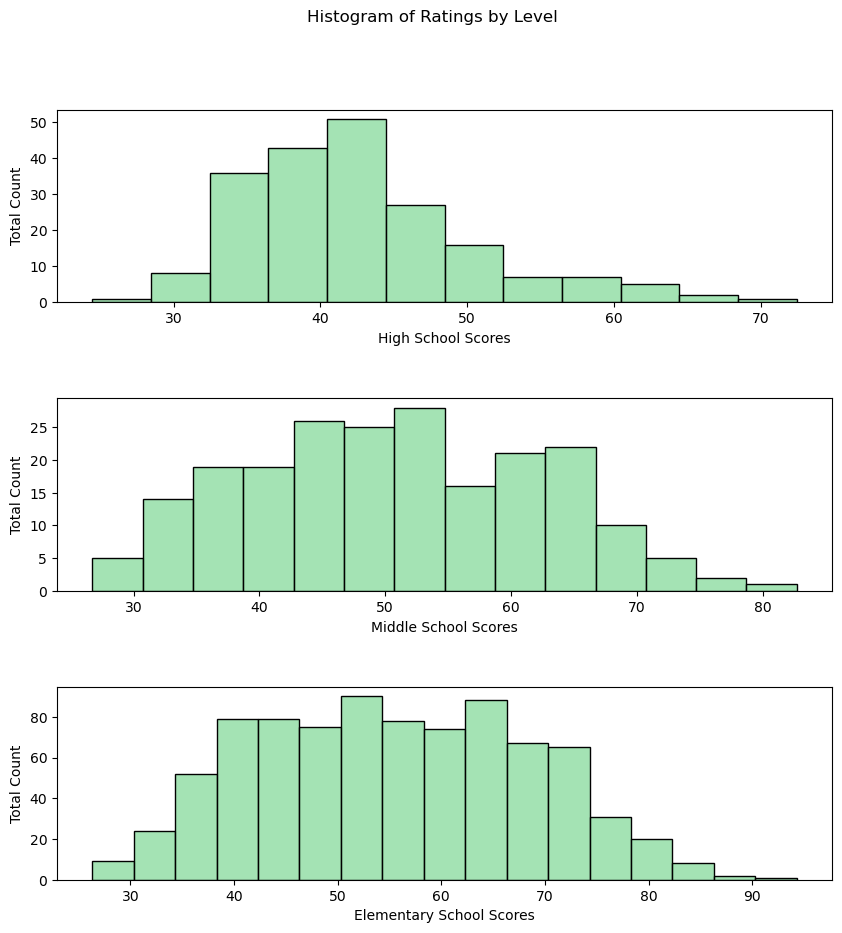

In [203]:
# Histogram
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(3, sharey=False, figsize=(10,10))

sns.histplot(hslist, color = '#86da9b', binwidth = 4, linewidth = 1, kde=False, stat='count', ax = axes[0])
sns.histplot(mslist, color = '#86da9b', binwidth = 4, linewidth = 1, kde=False, stat='count', ax = axes[1])
sns.histplot(eslist, color = '#86da9b', binwidth = 4, linewidth = 1, kde=False, stat='count', ax = axes[2])

axes[0].set_xlabel("High School Scores")
axes[1].set_xlabel("Middle School Scores")
axes[2].set_xlabel("Elementary School Scores")

axes[0].set_ylabel("Total Count")
axes[1].set_ylabel("Total Count")
axes[2].set_ylabel("Total Count")

fig.suptitle("Histogram of Ratings by Level")
fig.subplots_adjust(hspace = 0.5)

In [204]:
# Boxplot
fig = make_subplots(rows=1, cols=1, shared_xaxes=True)
fig.add_trace(go.Box(x=hslist, name = "High Schools"), row = 1, col = 1)
fig.add_trace(go.Box(x=mslist, name = "Middle Schools"), row = 1, col = 1)
fig.add_trace(go.Box(x=eslist, name = "Elementary Schools"), row = 1, col = 1)

fig.update_xaxes(title = "School Rating")
fig.update_layout(title = "Boxplot of Ratings by Level", height = 450, showlegend=False)

fig.show()

In [205]:
# Summary Statistics
def summary(arr):
    if len(arr) > 0:
        arr = np.asarray(arr).astype(np.float64)
        print("Mean:", "%.2f" % np.average(arr))
        print("Standard Deviation:", "%.2f" % np.std(arr))
        print("Minimum:", "%.2f" % np.min(arr))
        print("First Quartile:", "%.2f" % np.quantile(arr, 0.25))
        print("Median:", "%.2f" % np.median(arr))
        print("Third Quartile:", "%.2f" % np.quantile(arr, 0.75))
        print("Maximum:", "%.2f" % np.max(arr))
    else:
        print("None")

print("High School")
summary(hslist)

print("\nMiddle School")
summary(mslist)

print("\nElementary School")
summary(eslist)

High School
Mean: 42.50
Standard Deviation: 7.87
Minimum: 24.45
First Quartile: 36.74
Median: 41.38
Third Quartile: 46.16
Maximum: 71.45

Middle School
Mean: 50.73
Standard Deviation: 11.48
Minimum: 26.71
First Quartile: 42.00
Median: 50.55
Third Quartile: 59.77
Maximum: 81.86

Elementary School
Mean: 55.46
Standard Deviation: 13.10
Minimum: 26.31
First Quartile: 44.88
Median: 55.04
Third Quartile: 65.79
Maximum: 90.69


In [206]:
# Question 3: Repeat Step One delineated by county.
countylist = {}
counties = list(set(hs["County"]))
for county in counties:
    if county != "SEED":
        countylist[county] = list(hs["Score"][hs["County"] == county]) + list(ms["Score"][ms["County"] == county]) + list(es["Score"][es["County"] == county])

countylist["Washington"]

[58.25,
 39.650000000000006,
 36.7,
 48.0,
 46.5,
 37.5,
 50.1,
 44.55,
 42.0,
 60.800000000000004,
 60.42,
 68.975,
 71.35999999999999,
 70.975,
 61.88,
 52.685,
 71.725,
 66.175,
 73.35499999999999,
 62.21000000000001,
 65.41,
 68.24000000000001,
 73.94,
 73.595,
 63.64999999999999,
 71.355,
 71.815,
 54.855000000000004,
 66.66,
 59.06500000000001,
 63.82,
 73.94500000000001,
 41.58500000000001,
 49.230000000000004,
 59.64,
 57.12,
 65.47,
 58.41,
 59.385000000000005,
 75.23]

In [207]:
# Histogram
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(len(countylist), sharey=False, figsize=(10,4*len(countylist)))

c = 0
for county in countylist:
    sns.histplot(countylist[county], color = '#86da9b', binwidth = 4, linewidth = 1, kde=False, stat='count', ax = axes[c])
    axes[c].set_xlabel(str(county) + " School Scores")
    axes[c].set_ylabel("Total Count")
    c += 1
axes[0].set_title("Histogram of Ratings by County")
# fig.title = "Histogram of Ratings by County"
fig.subplots_adjust(hspace = 0.5)


In [208]:
# Boxplot
fig = make_subplots(rows=1, cols=1, shared_xaxes=True)#len(countylist), cols=1, shared_xaxes=True)

c = 1
for county in countylist:
    fig.add_trace(go.Box(y=countylist[county], name = str(county)), row = 1, col = 1)
    c += 1

fig.update_xaxes(title = "School Rating")
fig.update_layout(title = "Boxplot of Ratings by County", width = 50 * len(countylist), showlegend=False)
fig.show()

In [209]:
for county in countylist:
    print(county)
    summary(countylist[county])
    print()

Kent
Mean: 48.34
Standard Deviation: 10.80
Minimum: 37.95
First Quartile: 39.75
Median: 46.81
Third Quartile: 48.86
Maximum: 68.32

Frederick
Mean: 59.29
Standard Deviation: 10.88
Minimum: 38.45
First Quartile: 50.29
Median: 60.38
Third Quartile: 66.89
Maximum: 88.62

Wicomico
Mean: 49.01
Standard Deviation: 10.71
Minimum: 33.05
First Quartile: 40.68
Median: 47.43
Third Quartile: 58.54
Maximum: 68.29

Calvert
Mean: 57.88
Standard Deviation: 9.43
Minimum: 40.75
First Quartile: 50.15
Median: 60.56
Third Quartile: 63.53
Maximum: 71.52

Baltimore County
Mean: 49.00
Standard Deviation: 13.39
Minimum: 26.71
First Quartile: 38.04
Median: 45.92
Third Quartile: 58.70
Maximum: 84.34

Washington
Mean: 59.91
Standard Deviation: 11.14
Minimum: 36.70
First Quartile: 52.04
Median: 61.34
Third Quartile: 69.47
Maximum: 75.23

Dorchester
Mean: 47.72
Standard Deviation: 17.68
Minimum: 29.03
First Quartile: 33.65
Median: 44.69
Third Quartile: 58.74
Maximum: 80.57

Saint Mary's
Mean: 58.28
Standard Deviati

In [210]:
hs

School Name  School Number  Rigor Indicator  \
0    Barbara Ingram School for the Arts             40             0.36   
1                           Easton High            101             0.05   
2                       High Point High            102             0.18   
3                 Mardela Middle & High            102             0.30   
4    Washington Academy and High School            102             0.11   
..                                  ...            ...              ...   
199        Southern Garrett High School           3709             0.23   
200                      Annapolis High           4013             0.16   
201                       Southern High           4023             0.27   
202                    South River High           4293             0.42   
203            Chesapeake Science Point           6223             0.70   

     Equity Indicator  Attendance Indicator  AP Indicator  ESS Indicator  \
0                0.50                  0.95          0.09           0.85   
1                0.17                  0.90          0.06           0.46   
2                0.20                  0.88          0.02           0.41   
3                0.13                  0.92          0.03           0.67   
4                0.07                  0.91          0.01           0.28   
..                ...                   ...           ...            ...   
199              0.12                  0.91          0.04           0.69   
200              0.12                  0.90          0.05           0.32   
201              0.22                  0.92          0.06           0.47   
202              0.20                  0.87          0.13           0.51   
203              0.42                  0.92          0.05           0.82   

     Score           County  
0    58.25       Washington  
1    36.15           Talbot  
2    37.15  Prince George's  
3    41.90         Wicomico  
4    30.85         Somerset  
..     ...              ...  
199  40.75          Garrett  
200  34.05     Anne Arundel  
201  41.60     Anne Arundel  
202  43.65     Anne Arundel  
203  59.15     Anne Arundel  

[204 rows x 9 columns]

In [211]:
# Question 4: Repeat Step One delineated by county and level.

def county_scores(things):
    scores = {}
    i = len(things.columns)-1
    for row in range(len(things)):
        county = things.iloc[row][i]
        score = things.iloc[row][i-1]
        if county in scores:
            if county != "SEED":
                scores[county].append(score)
        else:
            if county != "SEED":
                scores[county] = [score]
    return scores

hscounty = county_scores(hs)
mscounty = county_scores(ms)
escounty = county_scores(es)

hs

School Name  School Number  Rigor Indicator  \
0    Barbara Ingram School for the Arts             40             0.36   
1                           Easton High            101             0.05   
2                       High Point High            102             0.18   
3                 Mardela Middle & High            102             0.30   
4    Washington Academy and High School            102             0.11   
..                                  ...            ...              ...   
199        Southern Garrett High School           3709             0.23   
200                      Annapolis High           4013             0.16   
201                       Southern High           4023             0.27   
202                    South River High           4293             0.42   
203            Chesapeake Science Point           6223             0.70   

     Equity Indicator  Attendance Indicator  AP Indicator  ESS Indicator  \
0                0.50                  0.95          0.09           0.85   
1                0.17                  0.90          0.06           0.46   
2                0.20                  0.88          0.02           0.41   
3                0.13                  0.92          0.03           0.67   
4                0.07                  0.91          0.01           0.28   
..                ...                   ...           ...            ...   
199              0.12                  0.91          0.04           0.69   
200              0.12                  0.90          0.05           0.32   
201              0.22                  0.92          0.06           0.47   
202              0.20                  0.87          0.13           0.51   
203              0.42                  0.92          0.05           0.82   

     Score           County  
0    58.25       Washington  
1    36.15           Talbot  
2    37.15  Prince George's  
3    41.90         Wicomico  
4    30.85         Somerset  
..     ...              ...  
199  40.75          Garrett  
200  34.05     Anne Arundel  
201  41.60     Anne Arundel  
202  43.65     Anne Arundel  
203  59.15     Anne Arundel  

[204 rows x 9 columns]

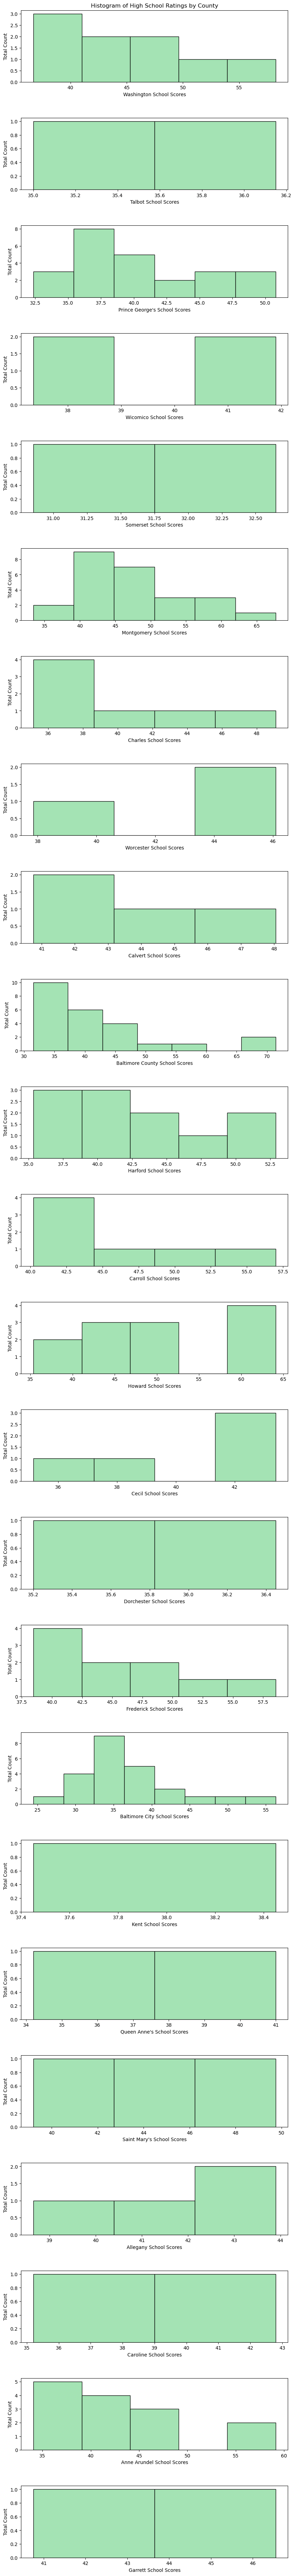

In [212]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(len(hscounty), sharey=False, figsize=(10,4*len(hscounty)))

c = 0
for county in hscounty:
    sns.histplot(hscounty[county], color = '#86da9b', linewidth = 1, kde=False, stat='count', ax = axes[c])
    axes[c].set_xlabel(str(county) + " School Scores")#binwidth = 4, 
    axes[c].set_ylabel("Total Count")
    c += 1
axes[0].set_title("Histogram of High School Ratings by County")
fig.subplots_adjust(hspace = 0.5)

In [213]:
# Boxplot
fig = make_subplots(rows=1, cols=1, shared_xaxes=True)#len(countylist), cols=1, shared_xaxes=True)

c = 1
for county in hscounty:
    fig.add_trace(go.Box(y=hscounty[county], name = str(county)), row = 1, col = 1)
    c += 1

fig.update_xaxes(title = "School Rating")
fig.update_layout(title = "Boxplot of High School Ratings by County", width = 50 * len(hscounty), showlegend=False)
fig.show()

In [214]:
# Boxplot
fig = make_subplots(rows=1, cols=1, shared_xaxes=True)#len(countylist), cols=1, shared_xaxes=True)

c = 1
for county in mscounty:
    fig.add_trace(go.Box(y=mscounty[county], name = str(county)), row = 1, col = 1)
    c += 1

fig.update_xaxes(title = "School Rating")
fig.update_layout(title = "Boxplot of Middle School Ratings by County", width = 50 * len(hscounty), showlegend=False)
fig.show()

In [215]:
# Boxplot
fig = make_subplots(rows=1, cols=1, shared_xaxes=True)#len(countylist), cols=1, shared_xaxes=True)

c = 1
for county in escounty:
    fig.add_trace(go.Box(y=escounty[county], name = str(county)), row = 1, col = 1)
    c += 1

fig.update_xaxes(title = "School Rating")
fig.update_layout(title = "Boxplot of Elementary School Ratings by County", width = 50 * len(hscounty), showlegend=False)
fig.show()

In [216]:
hscounty

{'Washington': [58.25,
  39.650000000000006,
  36.7,
  48.0,
  46.5,
  37.5,
  50.1,
  44.55,
  42.0],
 'Talbot': [36.15, 35.0],
 "Prince George's": [37.15,
  38.55,
  36.45,
  37.35,
  32.35,
  50.8,
  40.449999999999996,
  49.85,
  35.8,
  35.0,
  40.99999999999999,
  45.599999999999994,
  41.7,
  36.45,
  40.75,
  44.800000000000004,
  43.35,
  38.0,
  41.0,
  37.9,
  34.5,
  37.65,
  50.8,
  47.55],
 'Wicomico': [41.9, 38.5, 37.35, 40.849999999999994],
 'Somerset': [30.849999999999998, 32.65],
 'Montgomery': [41.050000000000004,
  46.349999999999994,
  61.8,
  54.5,
  44.39999999999999,
  61.10000000000001,
  50.199999999999996,
  48.8,
  41.3,
  44.199999999999996,
  55.349999999999994,
  55.25,
  67.7,
  49.0,
  42.65,
  36.6,
  33.4,
  59.150000000000006,
  45.650000000000006,
  47.65,
  47.449999999999996,
  41.75,
  40.699999999999996,
  41.49999999999999,
  39.6],
 'Charles': [42.49999999999999, 37.35, 35.65, 40.65, 49.1, 35.15, 37.9],
 'Worcester': [37.849999999999994, 46.1,

In [217]:
fig, axes = plt.subplots(len(mscounty), sharey=False, figsize=(10,4*len(mscounty)))

c = 0
for county in mscounty:
    sns.histplot(mscounty[county], color = '#86da9b', linewidth = 1, kde=False, stat='count', ax = axes[c])
    axes[c].set_xlabel(str(county) + " School Scores")#binwidth = 4, 
    axes[c].set_ylabel("Total Count")
    c += 1
axes[0].set_title("Histogram of Middle School Ratings by County")
fig.subplots_adjust(hspace = 0.5)

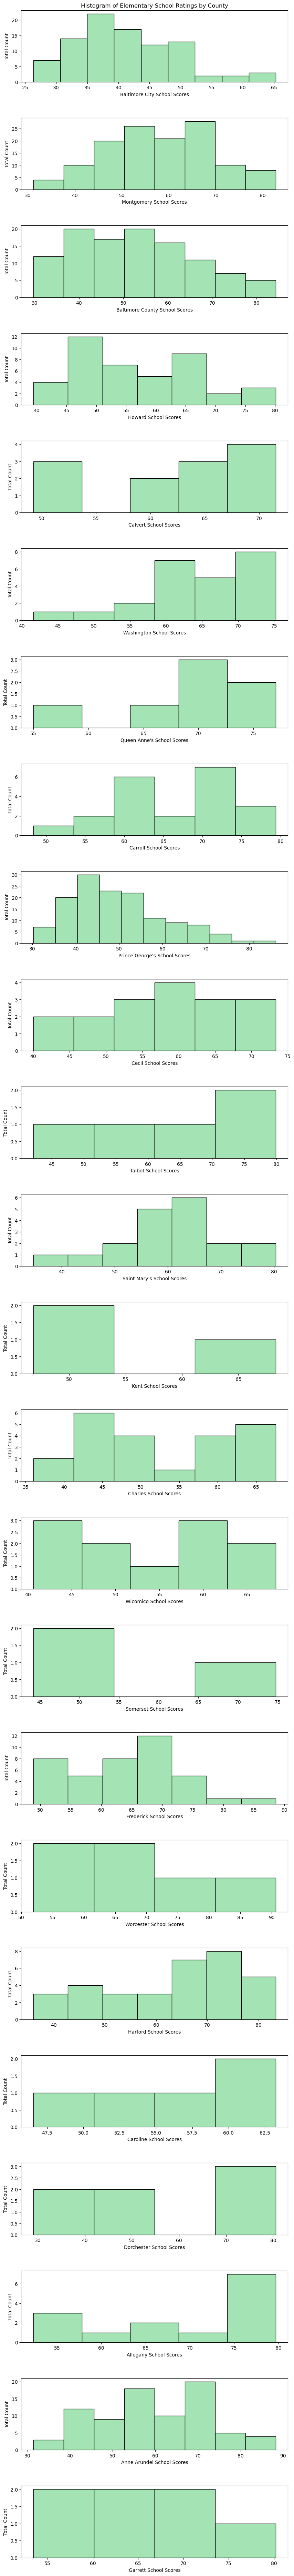

In [218]:
fig, axes = plt.subplots(len(escounty), sharey=False, figsize=(10,4*len(escounty)))

c = 0
for county in escounty:
    sns.histplot(escounty[county], color = '#86da9b', linewidth = 1, kde=False, stat='count', ax = axes[c])
    axes[c].set_xlabel(str(county) + " School Scores")#binwidth = 4, 
    axes[c].set_ylabel("Total Count")
    c += 1
axes[0].set_title("Histogram of Elementary School Ratings by County")
fig.subplots_adjust(hspace = 0.5)

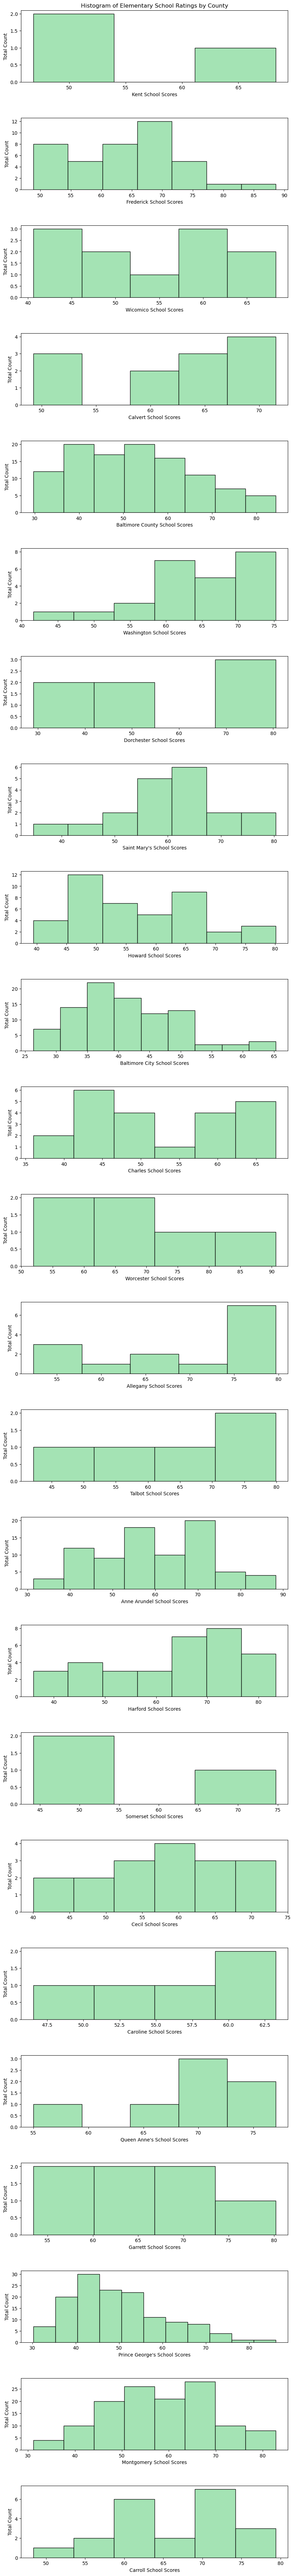

In [219]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(len(hscounty), sharey=False, figsize=(10,4*len(hscounty)))

c = 0
for county in countylist:
    if county != "SEED":
        sns.histplot(escounty[county], color = '#86da9b', linewidth = 1, kde=False, stat='count', ax = axes[c])
        axes[c].set_xlabel(str(county) + " School Scores")#binwidth = 4, 
        axes[c].set_ylabel("Total Count")
        c += 1
axes[0].set_title("Histogram of Elementary School Ratings by County")
fig.subplots_adjust(hspace = 0.5)

In [220]:
# Boxplot
fig = make_subplots(rows=1, cols=1)
fig.add_trace(go.Box(x=escounty['Montgomery'], name = ""))
fig.update_xaxes(title = "School Rating")
fig.update_layout(title = "Boxplot of Elementary School Ratings by Montgomery County")

In [283]:
print("High School:")
for county in hscounty:
    print(county)
    summary(hscounty[county])
    print()
print("\n")
print("Middle School:")
for county in mscounty:
    print(county)
    summary(mscounty[county])
    print()
print("\n")
print("Elementary School:")
for county in escounty:
    print(county)
    summary(escounty[county])
    print()
print("\n")

High School:
Washington
Mean: 44.81
Standard Deviation: 6.46
Minimum: 36.70
First Quartile: 39.65
Median: 44.55
Third Quartile: 48.00
Maximum: 58.25

Talbot
Mean: 35.58
Standard Deviation: 0.57
Minimum: 35.00
First Quartile: 35.29
Median: 35.58
Third Quartile: 35.86
Maximum: 36.15

Prince George's
Mean: 40.62
Standard Deviation: 5.15
Minimum: 32.35
First Quartile: 36.98
Median: 39.50
Third Quartile: 43.71
Maximum: 50.80

Wicomico
Mean: 39.65
Standard Deviation: 1.81
Minimum: 37.35
First Quartile: 38.21
Median: 39.67
Third Quartile: 41.11
Maximum: 41.90

Somerset
Mean: 31.75
Standard Deviation: 0.90
Minimum: 30.85
First Quartile: 31.30
Median: 31.75
Third Quartile: 32.20
Maximum: 32.65

Montgomery
Mean: 47.88
Standard Deviation: 8.33
Minimum: 33.40
First Quartile: 41.50
Median: 46.35
Third Quartile: 54.50
Maximum: 67.70

Charles
Mean: 39.76
Standard Deviation: 4.52
Minimum: 35.15
First Quartile: 36.50
Median: 37.90
Third Quartile: 41.57
Maximum: 49.10

Worcester
Mean: 42.95
Standard Dev

In [222]:
# 5. Create a list which list percentile for each school based on level

def percentile(arr):
    arr = np.asarray(arr).astype(np.float64)
    return [sum(np.absolute(arr) < score) / len(arr) for score in arr]

hs["Percentile"] = percentile(hslist)
ms["Percentile"] = percentile(mslist)
es["Percentile"] = percentile(eslist)

percentile(hslist)

[0.9362745098039216,
 0.20588235294117646,
 0.25980392156862747,
 0.5441176470588235,
 0.0196078431372549,
 0.4852941176470588,
 0.5735294117647058,
 0.30392156862745096,
 0.2696078431372549,
 0.4411764705882353,
 0.75,
 0.9754901960784313,
 0.06862745098039216,
 0.6176470588235294,
 0.9852941176470589,
 0.5,
 0.17647058823529413,
 0.8921568627450981,
 0.9019607843137255,
 0.6421568627450981,
 0.13725490196078433,
 0.8088235294117647,
 0.5686274509803921,
 0.4068627450980392,
 0.9607843137254902,
 0.21568627450980393,
 0.7450980392156863,
 0.35294117647058826,
 0.38235294117647056,
 0.5098039215686274,
 0.4166666666666667,
 0.8578431372549019,
 0.6911764705882353,
 0.6764705882352942,
 0.9656862745098039,
 0.11274509803921569,
 0.8676470588235294,
 0.8186274509803921,
 0.3382352941176471,
 0.4803921568627451,
 0.3627450980392157,
 0.16666666666666666,
 0.3284313725490196,
 0.47058823529411764,
 0.24019607843137256,
 0.6078431372549019,
 0.6323529411764706,
 0.8431372549019608,
 0.78921

In [223]:
# 6. Next to #5, put a list of the existing Maryland percentiles (or ranks) and calculate differences
hs["Maryland Percentile"] = percentile(base["Total Points Earned Percentage"])

basems = base_es[base_es["School Name"].isin(ms["School Name"])].reset_index(drop = True)
basems

for truth in (basems["School Name"] == ms["School Name"]):
    if truth == False:
        print(truth)

ms["Maryland Percentile"] = percentile(basems["Total Points Earned Percentage"])

basees = base_es[base_es["School Name"].isin(es["School Name"])].reset_index(drop = True)
basees

for truth in (basees["School Name"] == es["School Name"]):
    if truth == False:
        print(truth)

es["Maryland Percentile"] = percentile(basees["Total Points Earned Percentage"])

In [224]:
# 7. Repeat steps 1-3 on the differences calculated in #6
rankdiff = list(100*(hs["Percentile"] - hs["Maryland Percentile"])) + list(100*(ms["Percentile"] - ms["Maryland Percentile"])) + list(100*(es["Percentile"] - es["Maryland Percentile"]))
rankdiff

[-1.9607843137254943,
 -17.64705882352941,
 15.686274509803924,
 -12.254901960784315,
 -7.352941176470589,
 -0.4901960784313708,
 0.9803921568627416,
 -32.84313725490196,
 -22.058823529411764,
 -16.666666666666664,
 8.333333333333337,
 -0.9803921568627527,
 -6.862745098039216,
 5.392156862745101,
 -0.4901960784313708,
 25.49019607843137,
 -3.4313725490196068,
 4.90196078431373,
 8.823529411764708,
 20.09803921568628,
 -49.509803921568626,
 4.90196078431373,
 0.4901960784313708,
 -1.470588235294118,
 9.80392156862745,
 -2.9411764705882333,
 -1.4705882352941124,
 33.333333333333336,
 2.4509803921568594,
 -9.80392156862745,
 -2.4509803921568594,
 -6.862745098039225,
 -17.156862745098046,
 0.9803921568627527,
 1.4705882352941235,
 9.313725490196079,
 10.784313725490202,
 9.80392156862745,
 2.941176470588236,
 14.70588235294118,
 6.8627450980392135,
 -7.8431372549019605,
 -21.568627450980387,
 -7.352941176470584,
 -9.313725490196076,
 22.549019607843135,
 -8.823529411764708,
 -5.39215686274

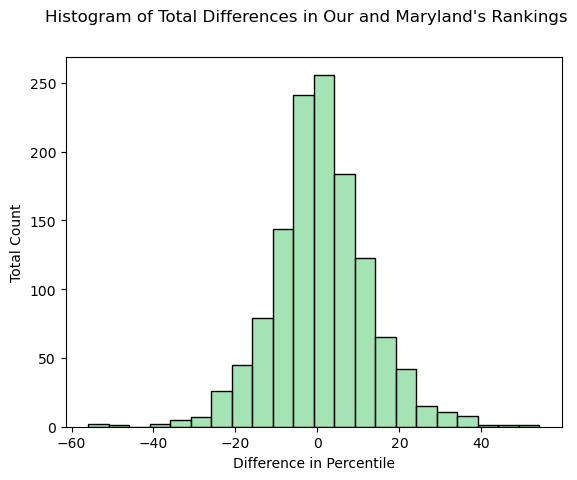

In [225]:
# Histogram
import matplotlib.pyplot as plt
import seaborn as sns

fig = plt.figure()
ax = fig.add_subplot(111)

sns.histplot(rankdiff, color = '#86da9b', binwidth = 5, linewidth = 1, kde=False, stat='count')

ax.set_xlabel("Difference in Percentile")
ax.set_ylabel("Total Count")

fig.suptitle("Histogram of Total Differences in Our and Maryland's Rankings")
fig.subplots_adjust(hspace = 0.5)

In [226]:
# Boxplot
fig = make_subplots(rows=1, cols=1)
fig.add_trace(go.Box(x=rankdiff, name = "All Schools"))
fig.update_xaxes(title = "Difference in Percentile")
fig.update_layout(title = "Boxplot of Total Differences in Our and Maryland's Rankings", height = 300, width = 800)
fig.show()

In [227]:
# Summary Statistics
whole = np.asarray(whole).astype(np.float64)
print("Mean:", "%.2f" % np.average(rankdiff))
print("Standard Deviation:", "%.2f" % np.std(rankdiff))
print("Minimum:", "%.2f" % np.min(rankdiff))
print("First Quartile:", "%.2f" % np.quantile(rankdiff, 0.25))
print("Median:", "%.2f" % np.median(rankdiff))
print("Third Quartile:", "%.2f" % np.quantile(rankdiff, 0.75))
print("Maximum:", "%.2f" % np.max(rankdiff))

Mean: 0.94
Standard Deviation: 11.85
Minimum: -55.87
First Quartile: -5.82
Median: 0.71
Third Quartile: 7.66
Maximum: 49.77


In [228]:
countydiff = {}
counties = list(set(hs["County"]))
for county in counties:
    countydiff[county] = list((hs["Percentile"][hs["County"] == county] - hs["Maryland Percentile"][hs["County"] == county])*100) + list((ms["Percentile"][ms["County"] == county] - ms["Maryland Percentile"][ms["County"] == county])*100) + list((es["Percentile"][es["County"] == county] - es["Maryland Percentile"][es["County"] == county])*100)

countydiff["Washington"]

[-1.9607843137254943,
 -1.470588235294118,
 -9.313725490196076,
 -5.392156862745101,
 -0.4901960784313708,
 -22.549019607843135,
 4.4117647058823595,
 -6.8627450980392135,
 -5.88235294117646,
 12.20657276995305,
 7.9812206572769995,
 0.9389671361502372,
 6.103286384976525,
 0.9389671361502372,
 19.718309859154925,
 13.6150234741784,
 12.589073634204272,
 18.527315914489307,
 8.78859857482185,
 -2.25653206650831,
 -3.0878859857482177,
 22.20902612826603,
 31.591448931116382,
 -2.6128266033254133,
 -2.9691211401425166,
 -4.038004750593826,
 1.7814726840855166,
 -0.9501187648456089,
 -1.4251781472684022,
 1.187648456057,
 10.213776722090262,
 6.057007125890735,
 1.781472684085511,
 3.444180522565321,
 -7.957244655581941,
 -18.527315914489307,
 21.14014251781473,
 14.014251781472687,
 23.040380047505938,
 3.444180522565321]

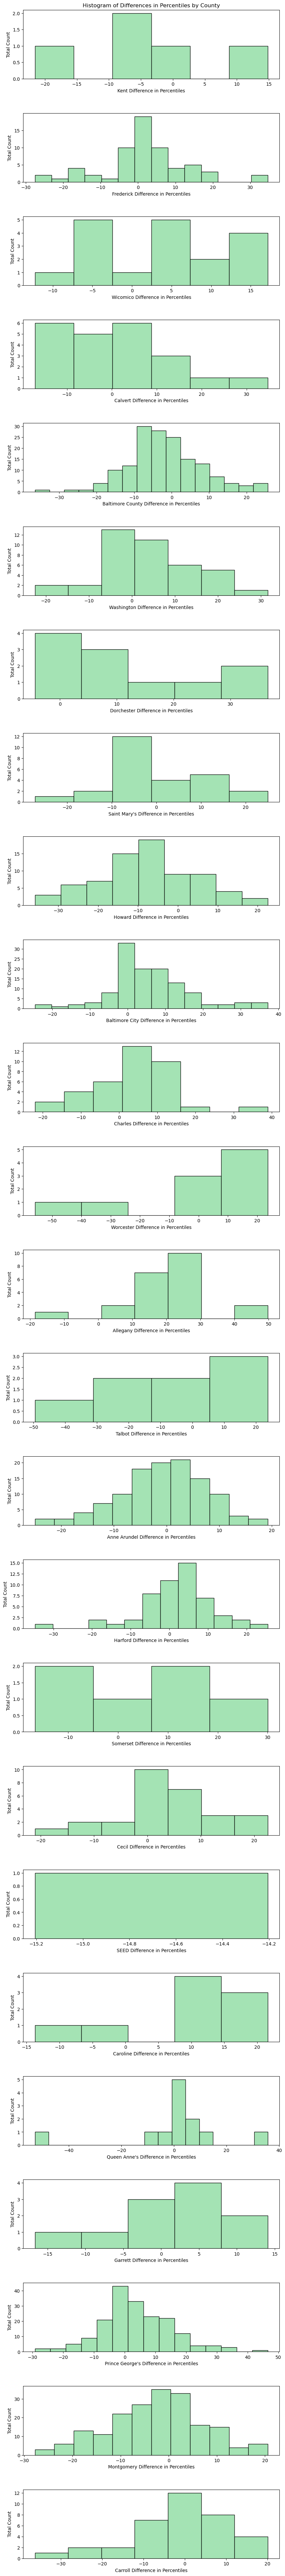

In [229]:
# Histogram
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(len(countydiff), sharey=False, figsize=(10,4*len(countydiff)))

c = 0
for county in countydiff:
    sns.histplot(countydiff[county], color = '#86da9b', linewidth = 1, kde=False, stat='count', ax = axes[c])
    axes[c].set_xlabel(str(county) + " Difference in Percentiles")
    axes[c].set_ylabel("Total Count")
    c += 1
axes[0].set_title("Histogram of Differences in Percentiles by County")
# fig.title = "Histogram of Ratings by County"
fig.subplots_adjust(hspace = 0.5)

In [230]:
# Boxplot
fig = make_subplots(rows=1, cols=1, shared_xaxes=True)#len(countydiff), cols=1, shared_xaxes=True)

c = 1
for county in countydiff:
    fig.add_trace(go.Box(y=countydiff[county], name = str(county)), row = 1, col = 1)
    c += 1

fig.update_xaxes(title = "School Rating")
fig.update_layout(title = "Boxplot of Differences of Percentiles by County", width = 50 * len(countylist), showlegend=False)
fig.show()

In [231]:
for county in countydiff:
    if county != "SEED":
        print(county + ":")
        summary(countylist[county])
        print()

Kent:
Mean: 48.34
Standard Deviation: 10.80
Minimum: 37.95
First Quartile: 39.75
Median: 46.81
Third Quartile: 48.86
Maximum: 68.32

Frederick:
Mean: 59.29
Standard Deviation: 10.88
Minimum: 38.45
First Quartile: 50.29
Median: 60.38
Third Quartile: 66.89
Maximum: 88.62

Wicomico:
Mean: 49.01
Standard Deviation: 10.71
Minimum: 33.05
First Quartile: 40.68
Median: 47.43
Third Quartile: 58.54
Maximum: 68.29

Calvert:
Mean: 57.88
Standard Deviation: 9.43
Minimum: 40.75
First Quartile: 50.15
Median: 60.56
Third Quartile: 63.53
Maximum: 71.52

Baltimore County:
Mean: 49.00
Standard Deviation: 13.39
Minimum: 26.71
First Quartile: 38.04
Median: 45.92
Third Quartile: 58.70
Maximum: 84.34

Washington:
Mean: 59.91
Standard Deviation: 11.14
Minimum: 36.70
First Quartile: 52.04
Median: 61.34
Third Quartile: 69.47
Maximum: 75.23

Dorchester:
Mean: 47.72
Standard Deviation: 17.68
Minimum: 29.03
First Quartile: 33.65
Median: 44.69
Third Quartile: 58.74
Maximum: 80.57

Saint Mary's:
Mean: 58.28
Standard

In [232]:
hsdiff = (hs["Percentile"] - hs["Maryland Percentile"])*100
msdiff = (ms["Percentile"] - ms["Maryland Percentile"])*100
esdiff = (es["Percentile"] - es["Maryland Percentile"])*100

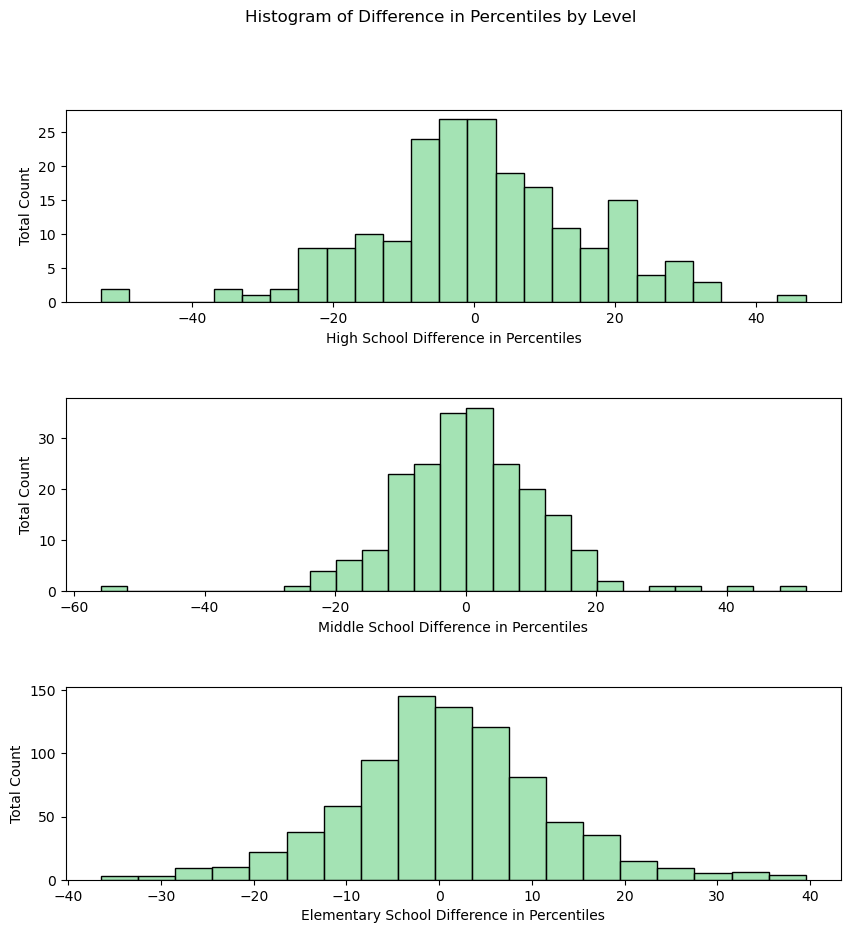

In [233]:
# Histogram
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(3, sharey=False, figsize=(10,10))

sns.histplot(hsdiff, color = '#86da9b', binwidth = 4, linewidth = 1, kde=False, stat='count', ax = axes[0])
sns.histplot(msdiff, color = '#86da9b', binwidth = 4, linewidth = 1, kde=False, stat='count', ax = axes[1])
sns.histplot(esdiff, color = '#86da9b', binwidth = 4, linewidth = 1, kde=False, stat='count', ax = axes[2])

axes[0].set_xlabel("High School Difference in Percentiles")
axes[1].set_xlabel("Middle School Difference in Percentiles")
axes[2].set_xlabel("Elementary School Difference in Percentiles")

axes[0].set_ylabel("Total Count")
axes[1].set_ylabel("Total Count")
axes[2].set_ylabel("Total Count")

fig.suptitle("Histogram of Difference in Percentiles by Level")
fig.subplots_adjust(hspace = 0.5)

In [234]:
# Boxplot
fig = make_subplots(rows=1, cols=1, shared_xaxes=True)
fig.add_trace(go.Box(x=hsdiff, name = "High Schools"), row = 1, col = 1)
fig.add_trace(go.Box(x=msdiff, name = "Middle Schools"), row = 1, col = 1)
fig.add_trace(go.Box(x=esdiff, name = "Elementary Schools"), row = 1, col = 1)

fig.update_xaxes(title = "Difference in Percentiles")
fig.update_layout(title = "Boxplot of Difference in Percentiles by Level", showlegend=False)

fig.show()

In [235]:
print("High School Differences:")
summary(hsdiff)
print("\nMiddle School Differences:")
summary(msdiff)
print("\nElementary School Differences:")
summary(esdiff)

High School Differences:
Mean: 1.04
Standard Deviation: 15.11
Minimum: -52.94
First Quartile: -7.35
Median: 0.49
Third Quartile: 9.80
Maximum: 46.57

Middle School Differences:
Mean: 0.95
Standard Deviation: 11.42
Minimum: -55.87
First Quartile: -5.16
Median: 0.47
Third Quartile: 7.51
Maximum: 49.77

Elementary School Differences:
Mean: 0.91
Standard Deviation: 11.03
Minimum: -36.46
First Quartile: -5.23
Median: 0.95
Third Quartile: 7.36
Maximum: 38.95


In [236]:
# By school and level
hscountydiff = {}
mscountydiff = {}
escountydiff = {}

counties = list(set(hs["County"]))
for county in counties:
    hscountydiff[county] = list(hs["Percentile"][hs["County"] == county] - hs["Maryland Percentile"][hs["County"] == county])
    mscountydiff[county] = list(ms["Percentile"][ms["County"] == county] - ms["Maryland Percentile"][ms["County"] == county])
    escountydiff[county] = list(es["Percentile"][es["County"] == county] - es["Maryland Percentile"][es["County"] == county])

hscountydiff["Washington"]

[-0.019607843137254943,
 -0.01470588235294118,
 -0.09313725490196076,
 -0.05392156862745101,
 -0.004901960784313708,
 -0.22549019607843135,
 0.044117647058823595,
 -0.06862745098039214,
 -0.05882352941176461]

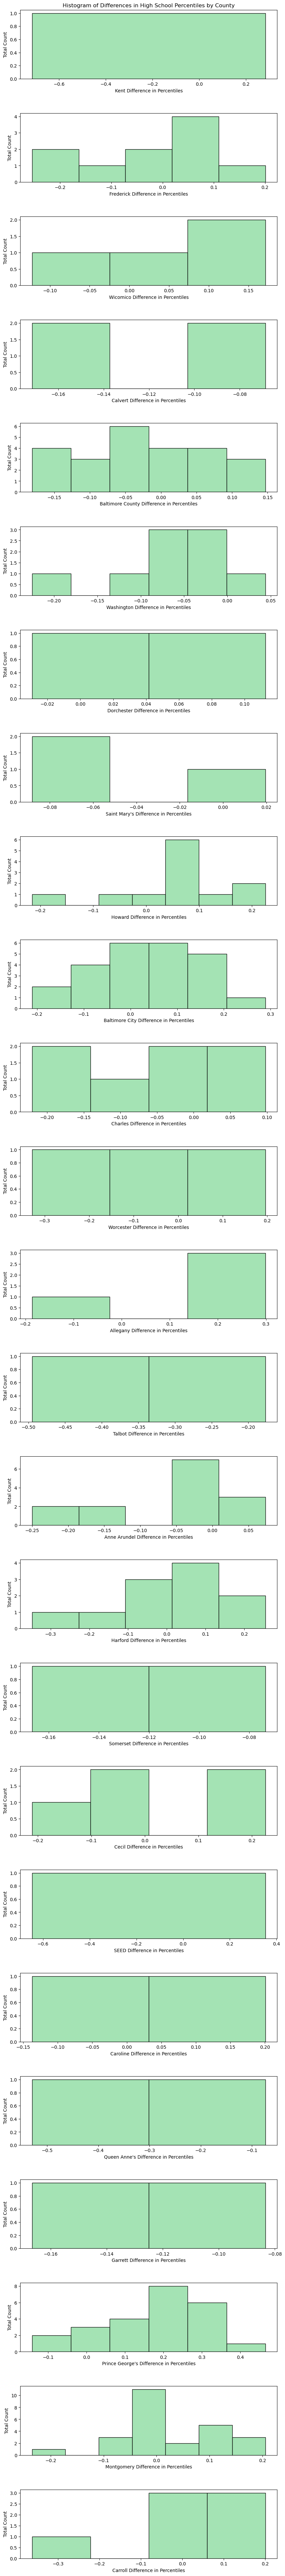

In [237]:
# Histogram HS
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(len(hscountydiff), sharey=False, figsize=(10,4*len(hscountydiff)))

c = 0
for county in hscountydiff:
    sns.histplot(hscountydiff[county], color = '#86da9b', linewidth = 1, kde=False, stat='count', ax = axes[c])
    axes[c].set_xlabel(str(county) + " Difference in Percentiles")
    axes[c].set_ylabel("Total Count")
    c += 1
axes[0].set_title("Histogram of Differences in High School Percentiles by County")
# fig.title = "Histogram of Ratings by County"
fig.subplots_adjust(hspace = 0.5)

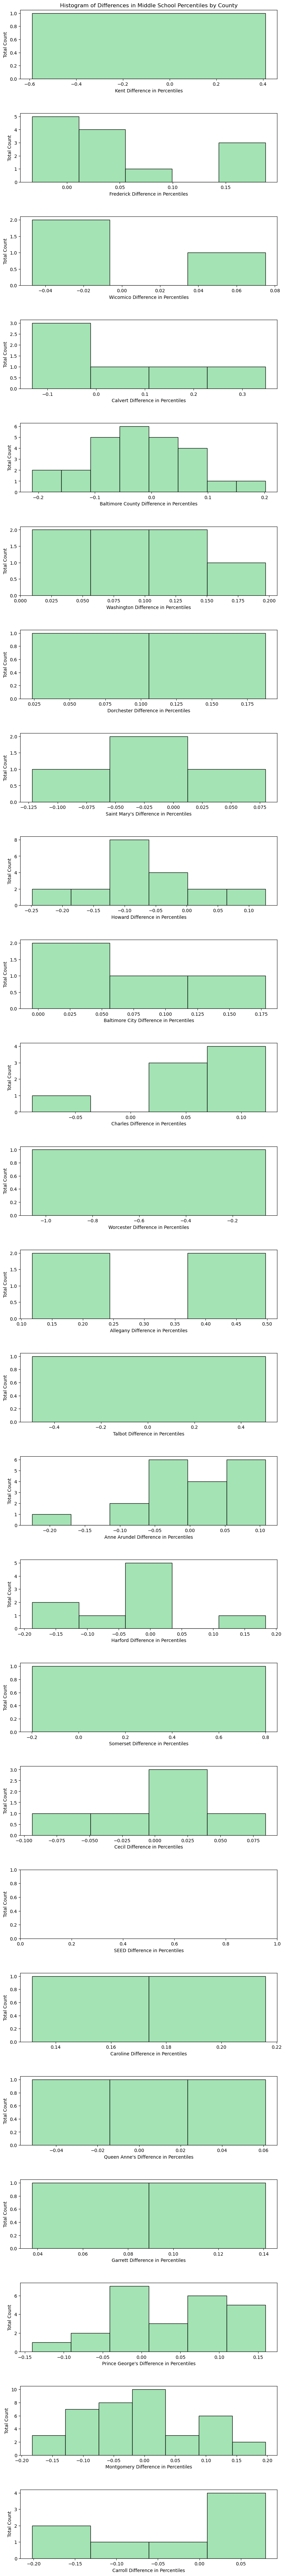

In [238]:
# Histogram MS
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(len(mscountydiff), sharey=False, figsize=(10,4*len(mscountydiff)))

c = 0
for county in mscountydiff:
    sns.histplot(mscountydiff[county], color = '#86da9b', linewidth = 1, kde=False, stat='count', ax = axes[c])
    axes[c].set_xlabel(str(county) + " Difference in Percentiles")
    axes[c].set_ylabel("Total Count")
    c += 1
axes[0].set_title("Histogram of Differences in Middle School Percentiles by County")
# fig.title = "Histogram of Ratings by County"
fig.subplots_adjust(hspace = 0.5)

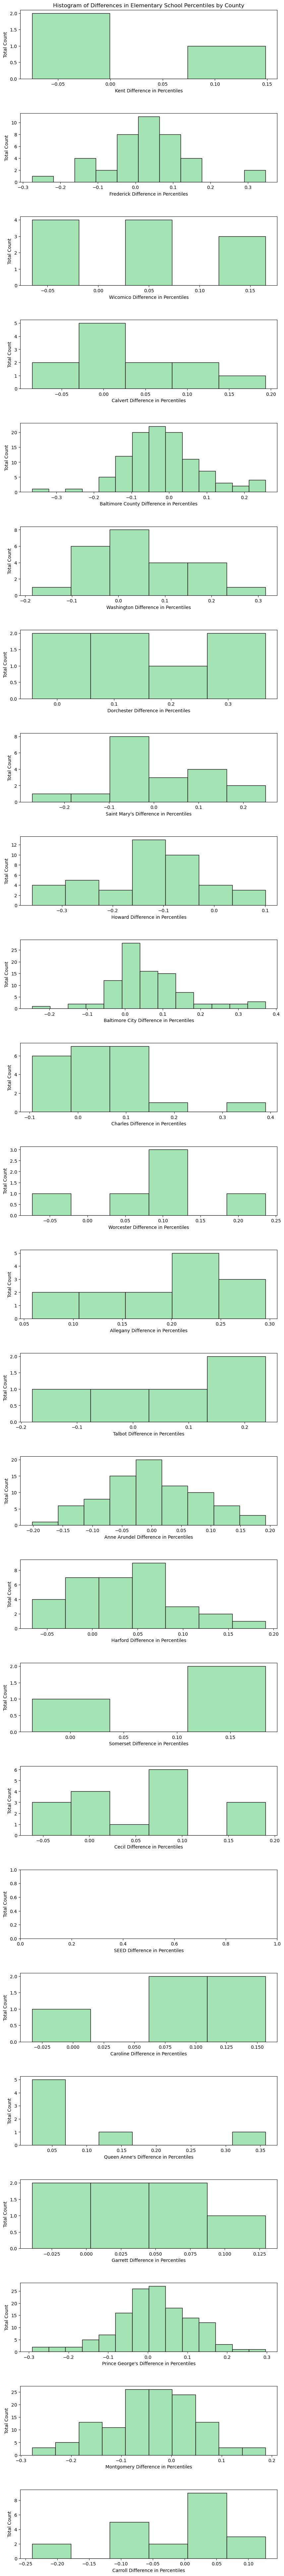

In [239]:
# Histogram ES
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(len(escountydiff), sharey=False, figsize=(10,4*len(escountydiff)))

c = 0
for county in escountydiff:
    sns.histplot(escountydiff[county], color = '#86da9b', linewidth = 1, kde=False, stat='count', ax = axes[c])
    axes[c].set_xlabel(str(county) + " Difference in Percentiles")
    axes[c].set_ylabel("Total Count")
    c += 1
axes[0].set_title("Histogram of Differences in Elementary School Percentiles by County")
# fig.title = "Histogram of Ratings by County"
fig.subplots_adjust(hspace = 0.5)

In [240]:
# Boxplot HS
fig = make_subplots(rows=1, cols=1)#len(hscountydiff), cols=1, shared_xaxes=True)

c = 1
for county in hscountydiff:
    fig.add_trace(go.Box(y=hscountydiff[county], name = str(county)), row = 1, col = 1)
    c += 1

fig.update_xaxes(title = "School Rating")
fig.update_layout(title = "Boxplot of Differences of High School Percentiles by County", width = 50 * len(countylist), showlegend=False)
fig.show()

In [241]:
# Boxplot MS
fig = make_subplots(rows=1, cols=1) #len(mscountydiff), cols=1, shared_xaxes=True)

c = 1
for county in mscountydiff:
    fig.add_trace(go.Box(y=mscountydiff[county], name = str(county)), row = 1, col = 1)
    c += 1

fig.update_xaxes(title = "School Rating")
fig.update_layout(title = "Boxplot of Differences of Middle School Percentiles by County", width = 50 * len(countylist), showlegend=False)
fig.show()

In [242]:
# Boxplot ES
fig = make_subplots(rows=1, cols=1)#len(escountydiff), cols=1, shared_xaxes=True)

c = 1
for county in escountydiff:
    fig.add_trace(go.Box(y=escountydiff[county], name = str(county)), row = 1, col = 1)
    c += 1

fig.update_xaxes(title = "School Rating")
fig.update_layout(title = "Boxplot of Differences of Elementary School Percentiles by County", width = 50 * len(countylist), showlegend=False)
fig.show()

In [243]:
print("High School Differences:")
for county in countydiff:
    print(county + ":")
    summary(hscountydiff[county])
    print()
print("\nMiddle School Differences:")
for county in countydiff:
    print(county + ":")
    summary(mscountydiff[county])
    print()
print("\nElementary School Differences:")
for county in countydiff:
    print(county + ":")
    summary(escountydiff[county])
    print()

High School Differences:
Kent:
Mean: -0.22
Standard Deviation: 0.00
Minimum: -0.22
First Quartile: -0.22
Median: -0.22
Third Quartile: -0.22
Maximum: -0.22

Frederick:
Mean: -0.02
Standard Deviation: 0.13
Minimum: -0.25
First Quartile: -0.09
Median: 0.01
Third Quartile: 0.03
Maximum: 0.20

Wicomico:
Mean: 0.04
Standard Deviation: 0.11
Minimum: -0.12
First Quartile: -0.00
Median: 0.06
Third Quartile: 0.10
Maximum: 0.17

Calvert:
Mean: -0.13
Standard Deviation: 0.04
Minimum: -0.17
First Quartile: -0.17
Median: -0.13
Third Quartile: -0.09
Maximum: -0.07

Baltimore County:
Mean: -0.02
Standard Deviation: 0.09
Minimum: -0.18
First Quartile: -0.08
Median: -0.03
Third Quartile: 0.05
Maximum: 0.15

Washington:
Mean: -0.06
Standard Deviation: 0.07
Minimum: -0.23
First Quartile: -0.07
Median: -0.05
Third Quartile: -0.01
Maximum: 0.04

Dorchester:
Mean: 0.04
Standard Deviation: 0.07
Minimum: -0.03
First Quartile: 0.01
Median: 0.04
Third Quartile: 0.08
Maximum: 0.11

Saint Mary's:
Mean: -0.05
Stan

In [244]:
# 8. Create three scatterplots, one for each level. Find the correlation for each level.
# 9. Now look at outliers. Which schools did much better comparatively on your ratings than Maryland’s? Which did worse? Why?
# 10. What commonalities can you identify between the school in #9

# 11. Run a regression predicting your percentile scores from the poverty level. Include pictures of residuals, report p-value and a confidence interval for the effect size
# 12. Repeat #11 using some measure of racial diversity as the predictor.
# 13. Combine #11 and #12 into a single multiple regression model
# 14. Look at the outliers from #13 . Both with negative and positive outliers. What are these schools? Do they have commonalities?


In [245]:
# 11. Run a regression predicting your percentile scores from the poverty level. Include pictures of residuals, report p-value and a confidence interval for the effect size
farms = pd.read_excel("FARMS Rate.xlsx")
farms = farms[pd.to_numeric(farms['School Number'], errors='coerce').notnull()]

hs["FARMS Rate"] = [farms[(farms["School Name"] == hs.iloc[school][0]) & (farms["School Number"] == int(hs.iloc[school][1]))]["FARMS Level"] for school in range(len(hs))]
hs

School Name  School Number  Rigor Indicator  \
0    Barbara Ingram School for the Arts             40             0.36   
1                           Easton High            101             0.05   
2                       High Point High            102             0.18   
3                 Mardela Middle & High            102             0.30   
4    Washington Academy and High School            102             0.11   
..                                  ...            ...              ...   
199        Southern Garrett High School           3709             0.23   
200                      Annapolis High           4013             0.16   
201                       Southern High           4023             0.27   
202                    South River High           4293             0.42   
203            Chesapeake Science Point           6223             0.70   

     Equity Indicator  Attendance Indicator  AP Indicator  ESS Indicator  \
0                0.50                  0.95          0.09           0.85   
1                0.17                  0.90          0.06           0.46   
2                0.20                  0.88          0.02           0.41   
3                0.13                  0.92          0.03           0.67   
4                0.07                  0.91          0.01           0.28   
..                ...                   ...           ...            ...   
199              0.12                  0.91          0.04           0.69   
200              0.12                  0.90          0.05           0.32   
201              0.22                  0.92          0.06           0.47   
202              0.20                  0.87          0.13           0.51   
203              0.42                  0.92          0.05           0.82   

     Score           County  Percentile  Maryland Percentile  \
0    58.25       Washington    0.936275             0.955882   
1    36.15           Talbot    0.205882             0.382353   
2    37.15  Prince George's    0.259804             0.102941   
3    41.90         Wicomico    0.544118             0.666667   
4    30.85         Somerset    0.019608             0.093137   
..     ...              ...         ...                  ...   
199  40.75          Garrett    0.441176             0.607843   
200  34.05     Anne Arundel    0.098039             0.308824   
201  41.60     Anne Arundel    0.519608             0.563725   
202  43.65     Anne Arundel    0.637255             0.759804   
203  59.15     Anne Arundel    0.950980             0.965686   

                                       FARMS Rate  
0    Series([], Name: FARMS Level, dtype: object)  
1    Series([], Name: FARMS Level, dtype: object)  
2    Series([], Name: FARMS Level, dtype: object)  
3    Series([], Name: FARMS Level, dtype: object)  
4    Series([], Name: FARMS Level, dtype: object)  
..                                            ...  
199  Series([], Name: FARMS Level, dtype: object)  
200  Series([], Name: FARMS Level, dtype: object)  
201  Series([], Name: FARMS Level, dtype: object)  
202  Series([], Name: FARMS Level, dtype: object)  
203  Series([], Name: FARMS Level, dtype: object)  

[204 rows x 12 columns]

In [246]:
farms = pd.read_excel("FARMS Rate.xlsx")
farms = farms[pd.to_numeric(farms['School Number'], errors='coerce').notnull()]
hs["FARMS Rate"] = [farms[(farms["School Name"] == hs.iloc[school][0]) & (farms["School Number"].astype(int) == int(hs.iloc[school][1]))].iloc[0][2] for school in range(len(hs))]
ms["FARMS Rate"] = [farms[(farms["School Name"] == ms.iloc[school][0]) & (farms["School Number"].astype(int) == int(ms.iloc[school][1]))].iloc[0][2] for school in range(len(ms))]
es["FARMS Rate"] = [farms[(farms["School Name"] == es.iloc[school][0]) & (farms["School Number"].astype(int) == int(es.iloc[school][1]))].iloc[0][2] for school in range(len(es))]

wholefarms = list(hs["FARMS Rate"]) + list(ms["FARMS Rate"]) + list(es["FARMS Rate"])
wholefarms

[23.8,
 43.5,
 69.1,
 41.8,
 62.9,
 49.0,
 18.4,
 68.0,
 27.2,
 26.8,
 35.0,
 8.9,
 70.0,
 37.3,
 39.1,
 60.3,
 68.3,
 17.5,
 26.5,
 35.6,
 39.8,
 15.4,
 24.2,
 54.6,
 12.7,
 100.0,
 45.9,
 70.8,
 38.5,
 24.7,
 38.0,
 9.6,
 10.8,
 40.2,
 7.9,
 48.9,
 29.5,
 34.4,
 48.9,
 62.9,
 59.9,
 41.9,
 52.3,
 19.8,
 68.9,
 42.6,
 16.5,
 18.6,
 42.4,
 11.1,
 7.9,
 30.6,
 8.6,
 9.7,
 53.0,
 47.9,
 84.0,
 72.3,
 74.0,
 49.8,
 80.7,
 42.4,
 15.4,
 57.6,
 72.5,
 67.1,
 10.2,
 19.4,
 72.9,
 31.6,
 35.5,
 0.0,
 42.7,
 15.0,
 55.3,
 17.2,
 54.7,
 63.6,
 74.4,
 59.5,
 20.4,
 57.1,
 52.6,
 12.9,
 0.0,
 76.5,
 73.5,
 72.2,
 60.8,
 70.8,
 45.6,
 56.8,
 35.3,
 61.8,
 18.1,
 6.5,
 16.4,
 11.9,
 42.7,
 71.2,
 31.2,
 38.4,
 0.0,
 24.2,
 64.9,
 58.4,
 17.9,
 27.0,
 47.7,
 20.0,
 6.6,
 66.2,
 48.5,
 38.2,
 36.3,
 36.2,
 34.2,
 38.6,
 20.5,
 38.3,
 23.9,
 35.2,
 46.6,
 46.5,
 29.8,
 28.1,
 17.8,
 100.0,
 7.6,
 40.3,
 6.9,
 56.4,
 45.4,
 57.9,
 56.5,
 53.4,
 34.2,
 35.0,
 66.5,
 26.1,
 18.9,
 48.7,
 8.5,
 8.5,
 20.8

In [284]:
from scipy import stats
from copy import deepcopy

linreg = stats.linregress(x = wholefarms, y = whole)
linreg.slope, linreg.intercept

# how do i do this
# if whole isn't sorted
# would it look weird?
# cause like there is no "line" in the graph if there is no order

# uh shouldnt it be fine as long as the percentiles are matched up with the schools since order doesn't rll ymatter if ur plotting everything
# also stein changed the assignemnt requirements so theres scatterplots now instead of the t-tests 

# oop lmao im kinda dumb
# ooh true
# oh ok

sortedwhole = deepcopy(whole)
sortedwhole.sort()

fig = make_subplots(rows = 1, cols = 1)
fig.add_trace(go.Scatter(x = wholefarms, y = whole, mode = "markers", name = "Scatterplot"))
fig.add_trace(go.Scatter(x = wholefarms, y = np.asarray(wholefarms)*linreg.slope + linreg.intercept, mode = "lines", name = "Least-Squares Regression Line"))
fig.update_xaxes(title = "Farms Percentange")
fig.update_yaxes(title = "School Score")
fig.update_layout(title = "Regression Predicting School Score from Farms Percentage", width = 800)

fig.show()

In [285]:
linreg.rvalue

-0.6243986431575606

In [248]:
linreg.pvalue

4.926196228556838e-137

In [249]:

linreg.slope

-0.3439779717009839

In [250]:
import scipy.stats as st
confidence_interval = 1.96*linreg.stderr
confidence_interval

0.02378849672781167

In [251]:
fig = make_subplots(rows = 1, cols = 1)
fig.add_trace(go.Scatter(x = wholefarms, y = whole - (np.asarray(wholefarms)*linreg.slope + linreg.intercept), mode = "markers"))
fig.update_xaxes(title = "Farms Percentange")
fig.update_yaxes(title = "Residuals")
fig.update_layout(title = "Residual Plot of Regression Predicting School Score from Farms Percentage")

fig.show()

In [252]:
linreg.pvalue

4.926196228556838e-137

In [272]:
import scipy.stats as st
confidence_interval = 1.96*linreg.stderr
print(confidence_interval)

fig = make_subplots(rows = 1, cols = 1)
fig.add_trace(go.Scatter(x = list(hs["White Pct"]) + list(ms["White Pct"]) + list(es["White Pct"]), y = whole - (np.asarray(list(hs["White Pct"]) + list(ms["White Pct"]) + list(es["White Pct"]))*linreg.slope + linreg.intercept), mode = "markers"))
fig.update_xaxes(title = "Farms Percentange")
fig.update_yaxes(title = "Residuals")
fig.update_layout(title = "Residual Plot of Regression Predicting School Score from Farms Percentage")

fig.show()

0.022183127431024314


In [254]:
linreg.slope

-0.3439779717009839

In [255]:
white = enr[enr['Race'] == 'All'][['School', 'School Name']]
out = []

for school in enr[enr['Race'] == 'All']['School Name'].values:
    if school not in enr[enr['Race'] == 'White']['School Name'].values:
        out.append(0)
    else:
        enrolled_white = enr[(enr['School Name'] == school)
                       & (enr['Race'] == 'White')]['Enrolled Count'].values[0]
        if enrolled_white == '*':
            out.append(0)
            continue
        out.append(int(enr[(enr['School Name'] == school)
                       & (enr['Race'] == 'White')]['Enrolled Count'].values[0])/int(enr[(enr['School Name'] == school)
                                                                          & (enr['Race'] == 'All')]['Enrolled Count'].values[0]))
white['Percent'] = out

# export to xlsx file 
white.to_csv("white.csv", index=False)
white


School                  School Name   Percent
4      0301        Flintstone Elementary  0.943128
11     0401        South Penn Elementary  0.724000
16     0402      John Humbird Elementary  0.696203
22     0405               Fort Hill High  0.842900
30     0406            Washington Middle  0.842975
...     ...                          ...       ...
9843   0884         Eager Street Academy  0.000000
9851      A   All Baltimore City Schools  0.073104
9856   1000  The Seed School of Maryland  0.000000
9861      A             All SEED Schools  0.000000
9869      A         All Maryland Schools  0.338829

[1418 rows x 3 columns]

In [256]:
white[white['School Name'] == hs['School Name'].values[0]]['Percent'].values[0]

0.7048192771084337

In [257]:
percent=[]
for i in range(len(hs['School Name'].values)):
    percent.append(white[white['School Name'] == hs['School Name'].values[i]]['Percent'].values[0])
hs['White Pct'] = percent
percent=[]
for i in range(len(ms['School Name'].values)):
    percent.append(white[white['School Name'] == ms['School Name'].values[i]]['Percent'].values[0])
ms['White Pct'] = percent
percent=[]
for i in range(len(es['School Name'].values)):
    percent.append(white[white['School Name'] == es['School Name'].values[i]]['Percent'].values[0])
es['White Pct'] = percent


In [286]:
linreg = stats.linregress(x = list(hs["White Pct"]) + list(ms["White Pct"]) + list(es["White Pct"]), y = whole)
linreg.slope, linreg.intercept

fig = make_subplots(rows = 1, cols = 1)
fig.add_trace(go.Scatter(x = list(hs["White Pct"]) + list(ms["White Pct"]) + list(es["White Pct"]), y = whole, mode = "markers", name = "Scatterplot"))
fig.add_trace(go.Scatter(x = list(hs["White Pct"]) + list(ms["White Pct"]) + list(es["White Pct"]), y = np.asarray(list(hs["White Pct"]) + list(ms["White Pct"]) + list(es["White Pct"]))*linreg.slope + linreg.intercept, mode = "lines", name = "Least-Squares Regression Line"))
fig.update_xaxes(title = "Percentage White")
fig.update_yaxes(title = "School Score")
fig.update_layout(title = "Regression Predicting School Score from Percentage White", width = 800)

fig.show()

In [287]:
linreg.rvalue

0.5764458081465486

In [278]:
linreg.pvalue

2.209602673868464e-112

In [275]:
linreg = stats.linregress(x = list(hs["White Pct"]) + list(ms["White Pct"]) + list(es["White Pct"]), y = whole)
linreg.slope, linreg.intercept

fig = make_subplots(rows = 1, cols = 1)
fig.add_trace(go.Scatter(x = list(hs["White Pct"]) + list(ms["White Pct"]) + list(es["White Pct"]), y = whole - (np.asarray(list(hs["White Pct"]) + list(ms["White Pct"]) + list(es["White Pct"]))*linreg.slope + linreg.intercept), mode = "markers", name = "Scatterplot"))
fig.update_xaxes(title = "Percentage White")
fig.update_yaxes(title = "Difference in School Score")
fig.update_layout(title = "Residual Plot of Regression Predicting School Score from Percentage White")

fig.show()

In [259]:
linreg = stats.linregress(x=hs["Percentile"], y=hs["Maryland Percentile"])
linreg.rvalue

0.8630207939115662

In [260]:
fig = make_subplots(rows = 1, cols = 1)
fig.add_trace(go.Scatter(x = es["Percentile"], y = es["Maryland Percentile"], mode = "markers"))
fig.update_layout(title = "Scatterplot of Calculated vs Actual Elementary School Percentiles")
fig.update_xaxes(title = "Calculated Score")
fig.update_yaxes(title = "Actual Score")
fig.update_layout(width = 700, height = 700)
fig.show()

linreg = stats.linregress(x=es["Percentile"], y=es["Maryland Percentile"])
linreg.rvalue

0.9267121151015746

In [271]:
fig = make_subplots(rows = 1, cols = 1)
fig.add_trace(go.Scatter(x = list(es["Percentile"]) + list(ms["Percentile"]) + list(hs["Percentile"]), y = list(es["Maryland Percentile"]) + list(ms["Maryland Percentile"]) + list(hs["Maryland Percentile"]), mode = "markers"))
fig.update_layout(title = "Scatterplot of Calculated vs Actual School Percentiles")
fig.update_xaxes(title = "Calculated Score")
fig.update_yaxes(title = "Actual Score")
fig.update_layout(width = 700, height = 700)
fig.show()

linreg = stats.linregress(x = list(es["Percentile"]) + list(ms["Percentile"]) + list(hs["Percentile"]), y = list(es["Maryland Percentile"]) + list(ms["Maryland Percentile"]) + list(hs["Maryland Percentile"]))
linreg.rvalue

0.9155458173794978

In [261]:
hs

School Name  School Number  Rigor Indicator  \
0    Barbara Ingram School for the Arts             40             0.36   
1                           Easton High            101             0.05   
2                       High Point High            102             0.18   
3                 Mardela Middle & High            102             0.30   
4    Washington Academy and High School            102             0.11   
..                                  ...            ...              ...   
199        Southern Garrett High School           3709             0.23   
200                      Annapolis High           4013             0.16   
201                       Southern High           4023             0.27   
202                    South River High           4293             0.42   
203            Chesapeake Science Point           6223             0.70   

     Equity Indicator  Attendance Indicator  AP Indicator  ESS Indicator  \
0                0.50                  0.95          0.09           0.85   
1                0.17                  0.90          0.06           0.46   
2                0.20                  0.88          0.02           0.41   
3                0.13                  0.92          0.03           0.67   
4                0.07                  0.91          0.01           0.28   
..                ...                   ...           ...            ...   
199              0.12                  0.91          0.04           0.69   
200              0.12                  0.90          0.05           0.32   
201              0.22                  0.92          0.06           0.47   
202              0.20                  0.87          0.13           0.51   
203              0.42                  0.92          0.05           0.82   

     Score           County  Percentile  Maryland Percentile  FARMS Rate  \
0    58.25       Washington    0.936275             0.955882        23.8   
1    36.15           Talbot    0.205882             0.382353        43.5   
2    37.15  Prince George's    0.259804             0.102941        69.1   
3    41.90         Wicomico    0.544118             0.666667        41.8   
4    30.85         Somerset    0.019608             0.093137        62.9   
..     ...              ...         ...                  ...         ...   
199  40.75          Garrett    0.441176             0.607843        37.8   
200  34.05     Anne Arundel    0.098039             0.308824        55.3   
201  41.60     Anne Arundel    0.519608             0.563725        32.1   
202  43.65     Anne Arundel    0.637255             0.759804        14.5   
203  59.15     Anne Arundel    0.950980             0.965686        22.3   

     White Pct  
0     0.704819  
1     0.534130  
2     0.018652  
3     0.771978  
4     0.291519  
..         ...  
199   0.963691  
200   0.283001  
201   0.691262  
202   0.725238  
203   0.248000  

[204 rows x 13 columns]

In [262]:
def find_outliers_IQR(df):

   q1=df.quantile(0.25)

   q3=df.quantile(0.75)

   IQR=q3-q1

   outliers = df[((df<(q1-1.5*IQR)) | (df>(q3+1.5*IQR)))]

   return outliers

#print(find_outliers_IQR(hsdiff).iloc[:,0])
find_outliers_IQR(hsdiff).index

Index([20, 73, 97, 106, 155], dtype='int64')

In [263]:
len(es['School Name'])

842

In [ ]:
for school in find_outliers_IQR(esdiff).index:
    print(es['School Name'].values[school], find_outliers_IQR(esdiff)[school])

Liberty Elementary 34.679334916864605
Edgewood Elementary 37.17339667458432
William Paca Elementary 33.729216152019
Rockburn Elementary -29.334916864608076
Sudlersville Elementary School 35.74821852731592
Ilchester Elementary -32.42280285035629
Lakewood Elementary -24.82185273159144
Belmont Elementary 28.38479809976247
Hollifield Station Elementary -24.228028503562943
Veterans Elementary -34.32304038004751
Beverly Farms Elementary -27.79097387173397
Arlington Elementary 32.42280285035629
Mt Hope/Nanjemoy Elementary School 38.95486935866983
Vienna Elementary School 36.57957244655582
Manor Woods Elementary -26.72209026128266
City Neighbors Hamilton -24.584323040380045
John Humbird Elementary 28.622327790973873
Hancock Elementary 31.591448931116382
Clarksville Elementary -35.86698337292162
South Dorchester School 29.69121140142518
Hollywood Elementary -27.197149643705465
Thunder Hill Elementary -25.17814726840855
Stoneleigh Elementary -25.296912114014248
Spring Ridge Elementary -27.553444